# ***NOTEBOOK FOR ANALYSING THE `SYNTHEA` DATA***

**GOAL IS TO FIND STRONG REASONS BEHIND PATIENTS READMISSION**

### **Data import and modification**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys, os
sys.path.append(os.path.abspath(r"C:\Users\Rano's PC\Machine\github_repo_cloned\my-personal-projects\synthea readmission analysis"))

import src.plots as P
import src.stat_tests as S

plt.style.use('https://github.com/dhaitz/matplotlib-stylesheets/raw/master/pitayasmoothie-light.mplstyle')

In [2]:
data = pd.read_csv(r"C:\Users\Rano's PC\Machine\github_repo_cloned\my-personal-projects\synthea readmission analysis\data\processed_data\processed_synthea_data.csv")

In [3]:
pd.set_option('display.max_columns',None)

In [4]:
data.head()

,encounter_start,encounterclass,base_encounter_cost,payer_coverage,duration,total_procedures,avg_procedure_cost,total_medicines,avg_base_medicine_cost,avg_total_medicine_cost,reasons_for_medications,is_ongoing_condition,total_conditions,is_ongoing_careplan,total_careplans,age_as_2022,marital,race,ethnicity,patient_gender,provider_gender,utilization,caused_readmission,condition_duration,careplan_duration
0,2010-11-09 15:06:37,WELLNESS,129.16,129.16,same_day,1.0,648.01,0.0,0.00,0.00,0.0,-1.0,0.0,-1.0,0.0,18,UNKNOWN,WHITE,NONHISPANIC,M,M,25,0,NaN,NaN
1,2011-11-15 15:06:37,WELLNESS,129.16,129.16,same_day,0.0,0.00,0.0,0.00,0.00,0.0,-1.0,0.0,-1.0,0.0,18,UNKNOWN,WHITE,NONHISPANIC,M,M,25,0,NaN,NaN
2,2012-08-03 15:06:37,AMBULATORY,129.16,54.16,same_day,1.0,2230.40,0.0,0.00,0.00,0.0,0.0,1.0,-1.0,0.0,18,UNKNOWN,WHITE,NONHISPANIC,M,M,1616,0,8 days,NaN
3,2012-10-14 15:06:37,AMBULATORY,129.16,54.16,same_day,0.0,0.00,1.0,20.48,20.48,1.0,0.0,1.0,-1.0,0.0,18,UNKNOWN,WHITE,NONHISPANIC,M,M,1616,0,11 days,NaN
4,2012-11-20 15:06:37,WELLNESS,129.16,129.16,same_day,1.0,590.58,0.0,0.00,0.00,0.0,-1.0,0.0,-1.0,0.0,18,UNKNOWN,WHITE,NONHISPANIC,M,M,25,0,NaN,NaN


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53346 entries, 0 to 53345
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   encounter_start          53346 non-null  object 
 1   encounterclass           53346 non-null  object 
 2   base_encounter_cost      53346 non-null  float64
 3   payer_coverage           53346 non-null  float64
 4   duration                 53346 non-null  object 
 5   total_procedures         53346 non-null  float64
 6   avg_procedure_cost       53346 non-null  float64
 7   total_medicines          53346 non-null  float64
 8   avg_base_medicine_cost   53346 non-null  float64
 9   avg_total_medicine_cost  53346 non-null  float64
 10  reasons_for_medications  53346 non-null  float64
 11  is_ongoing_condition     53346 non-null  float64
 12  total_conditions         53346 non-null  float64
 13  is_ongoing_careplan      53346 non-null  float64
 14  total_careplans       

In [6]:
data[['total_procedures','total_medicines','reasons_for_medications','is_ongoing_condition','total_conditions','is_ongoing_careplan','total_careplans']] =data[['total_procedures','total_medicines','reasons_for_medications','is_ongoing_condition','total_conditions','is_ongoing_careplan','total_careplans']].astype('Int64')

In [7]:
data.head(1)

,encounter_start,encounterclass,base_encounter_cost,payer_coverage,duration,total_procedures,avg_procedure_cost,total_medicines,avg_base_medicine_cost,avg_total_medicine_cost,reasons_for_medications,is_ongoing_condition,total_conditions,is_ongoing_careplan,total_careplans,age_as_2022,marital,race,ethnicity,patient_gender,provider_gender,utilization,caused_readmission,condition_duration,careplan_duration
0,2010-11-09 15:06:37,WELLNESS,129.16,129.16,same_day,1,648.01,0,0.0,0.0,0,-1,0,-1,0,18,UNKNOWN,WHITE,NONHISPANIC,M,M,25,0,NaN,NaN


In [8]:
data['condition_duration']= data['condition_duration'].str.replace(' days',"").astype('Int64')

In [9]:
data['careplan_duration']= data['careplan_duration'].str.replace(' days',"").astype('Int64')

In [10]:
data[['careplan_duration','condition_duration']] = data[['careplan_duration','condition_duration']].fillna(0)

In [11]:
data.shape

(53346, 25)

***

## **Univariate Analysis of data**

In [12]:
data.describe().round(2)

,base_encounter_cost,payer_coverage,total_procedures,avg_procedure_cost,total_medicines,avg_base_medicine_cost,avg_total_medicine_cost,reasons_for_medications,is_ongoing_condition,total_conditions,is_ongoing_careplan,total_careplans,age_as_2022,utilization,caused_readmission,condition_duration,careplan_duration
count,53346.00,53346.00,53346.0,53346.00,53346.0,53346.00,53346.00,53346.0,53346.0,53346.0,53346.0,53346.0,53346.00,53346.00,53346.00,53346.0,53346.0
mean,128.75,62.00,0.66,2129.45,0.8,162.61,1431.68,0.5,-0.8,0.16,-0.91,0.07,55.66,1329.70,0.39,7.46,7.07
std,4.58,43.61,1.7,5596.18,1.2,406.75,9931.92,0.61,0.53,0.41,0.38,0.25,25.87,1427.73,0.49,156.34,117.48
min,77.49,0.00,0.0,0.00,0.0,0.00,0.00,0.0,-1.0,0.0,-1.0,0.0,0.00,1.00,0.00,0.0,0.0
25%,129.16,17.49,0.0,0.00,0.0,0.00,0.00,0.0,-1.0,0.0,-1.0,0.0,35.00,86.00,0.00,0.0,0.0
50%,129.16,69.16,0.0,0.00,1.0,6.80,7.22,0.0,-1.0,0.0,-1.0,0.0,58.00,821.00,0.00,0.0,0.0
75%,129.16,89.16,1.0,602.04,1.0,263.49,1783.74,1.0,-1.0,0.0,-1.0,0.0,73.00,2159.00,1.00,0.0,0.0
max,129.16,129.16,21.0,187968.69,10.0,6901.17,1296594.95,4.0,1.0,7.0,1.0,2.0,112.00,4828.00,1.00,17946.0,10203.0


### ***Statistical insights from numerical columns***

- max value of `avg_procedure_cost` is very high

- max value of `average_total_medicine_cost` is too high

- `utilization` column is spreaded from 1 to 4828

- `age` column have values from 0 to 112 as of 2022

- max value in `condition_duration` is too high

- max value for `careplan_duration` is also very high

In [13]:
data.describe(include='object')

,encounter_start,encounterclass,duration,marital,race,ethnicity,patient_gender,provider_gender
count,53346,53346,53346,53346,53346,53346,53346,53346
unique,50029,6,4,3,5,2,2,2
top,1973-07-27 23:35:03,WELLNESS,same_day,MARRIED,WHITE,NONHISPANIC,F,F
freq,7,19106,51759,30413,41794,49267,26891,31135


### ***Statistical insights from categorical columns***

- max `encounter` in single day is 7

- `encounter_class` have 6 uniqe values, wellness being most frequent

- `duration` column have 4 unique values, same_day being the most frequent

In [14]:
data.select_dtypes(include='number').nunique().reset_index(name = 'total_unique_values')

,index,total_unique_values
0,base_encounter_cost,2
1,payer_coverage,15
2,total_procedures,10
3,avg_procedure_cost,15909
4,total_medicines,11
5,avg_base_medicine_cost,11010
6,avg_total_medicine_cost,11986
7,reasons_for_medications,5
8,is_ongoing_condition,3
9,total_conditions,7


In [15]:
data.select_dtypes(include='object').nunique().reset_index(name = 'total_unique_values')

,index,total_unique_values
0,encounter_start,50029
1,encounterclass,6
2,duration,4
3,marital,3
4,race,5
5,ethnicity,2
6,patient_gender,2
7,provider_gender,2


In [16]:
small_cat_cols = ['encounterclass', 'duration', 'marital','race', 'ethnicity', 'patient_gender', 
                  'provider_gender','base_encounter_cost','reasons_for_medications','is_ongoing_condition','is_ongoing_careplan','total_careplans']

In [17]:
large_num_cols = ['avg_procedure_cost','avg_base_medicine_cost','avg_total_medicine_cost','age_as_2022', 'utilization','condition_duration', 'careplan_duration']

In [18]:
large_cat_cols = ['payer_coverage', 'total_procedures','total_medicines','total_conditions']

In [19]:
target_col = ['caused_readmission']

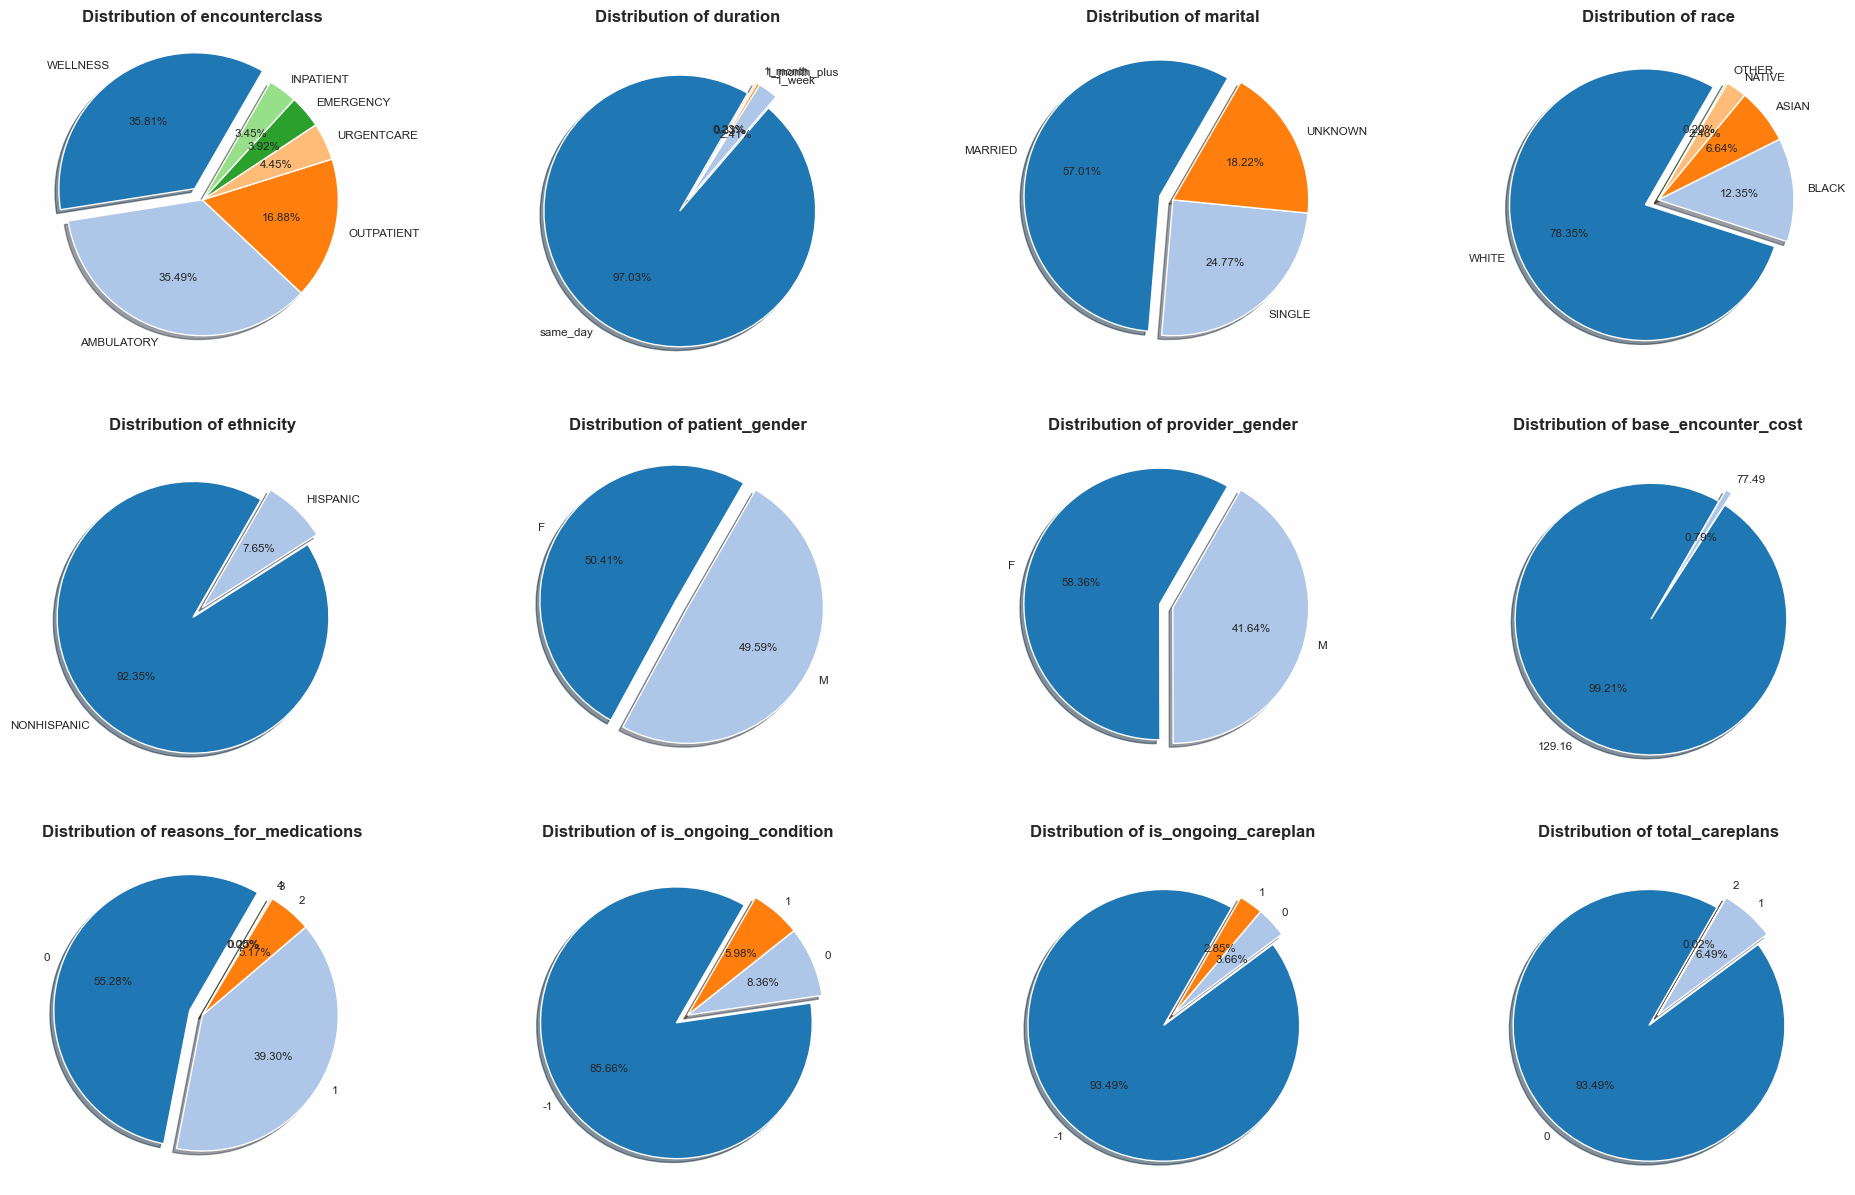

In [20]:
fig = plt.figure(figsize=(24,15))
limit = len(small_cat_cols)
for i,column in enumerate(small_cat_cols):
    if i> limit:
        break
    plt.subplot(3,4,i+1)
    P.plot_pie(column=column,data=data)

### ***Insights from univariate analysis of small classed categorical columns***

- `wellness` and `ambulatory` is most frequent in `enounterclass` column

- more than 97% `duration` belongs to `same_day` class

- `marital` column have more than 57% of values as `married`

- more than 75% of observations in `race` column is `white`

- approx 93% of observations in `ethnicity` column is hispanic

- `patient_gender` is equally distributed among male and females

- few more `female` observations in `provider_gender` column

- `base_encounter_cost` is 129.16 for more than 99% observations

- `reason_for_medicine` column have 0 as most frequent value, more than 55%

- only approx 6% of observations are ongoing according to `is_ongoing_condition` column

- only approx 3% of observations are ongoing according to `is_ongoing_careplan` column

- `total_careplans` column have 0 as most frequent value

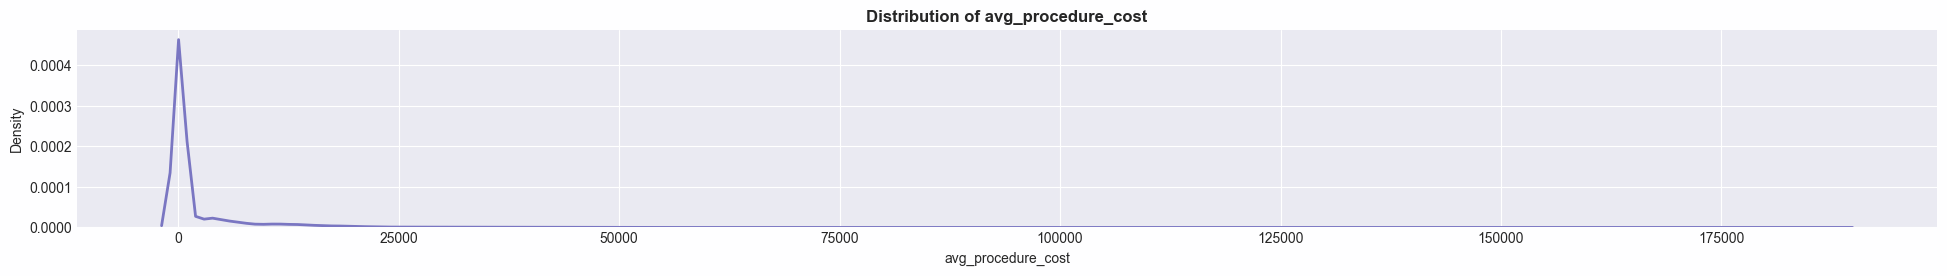

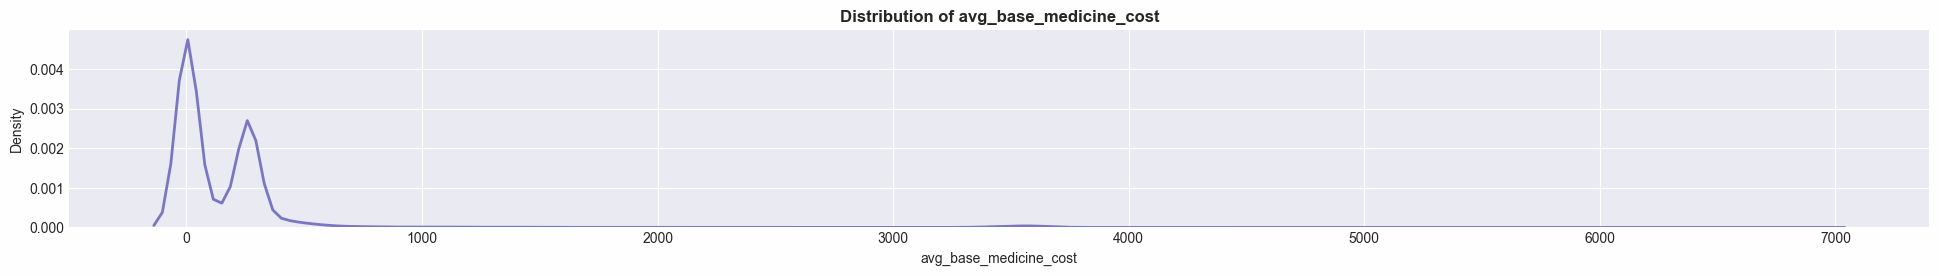

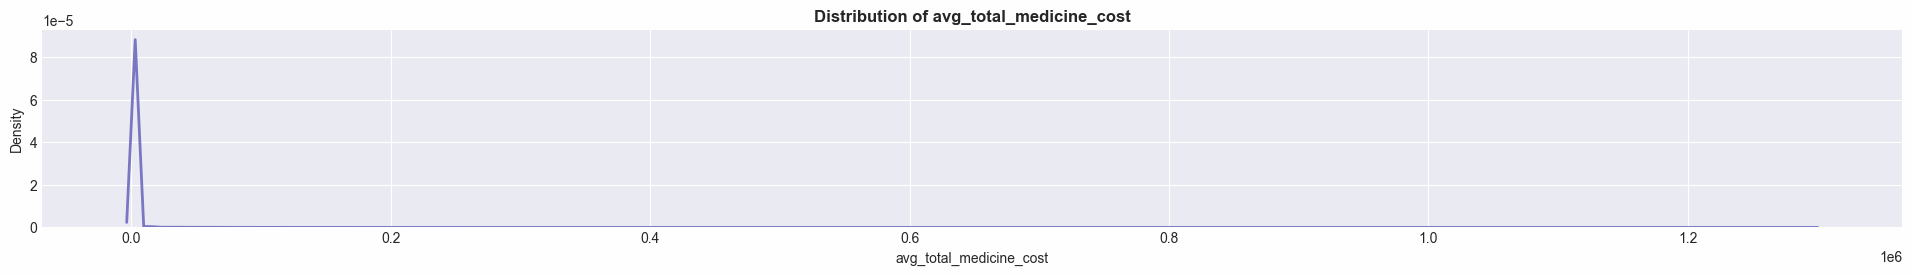

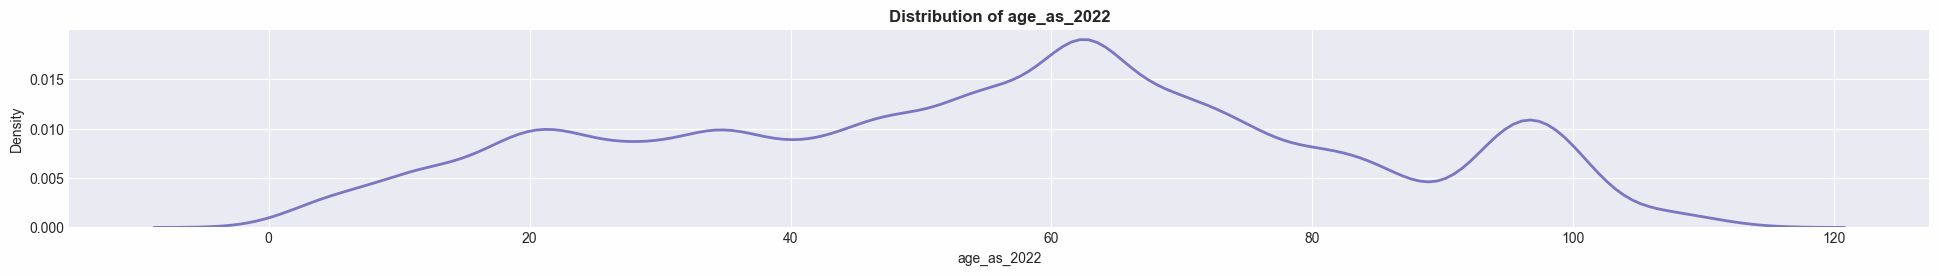

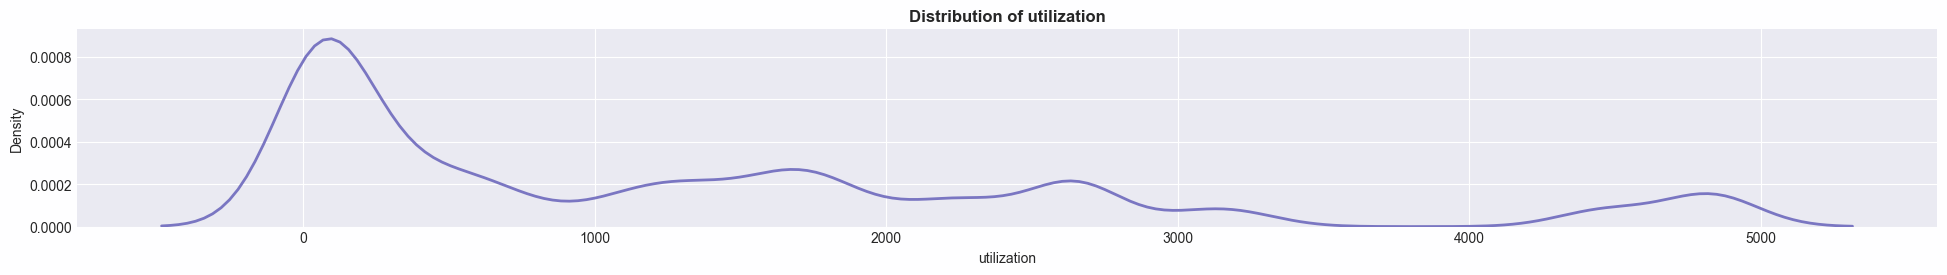

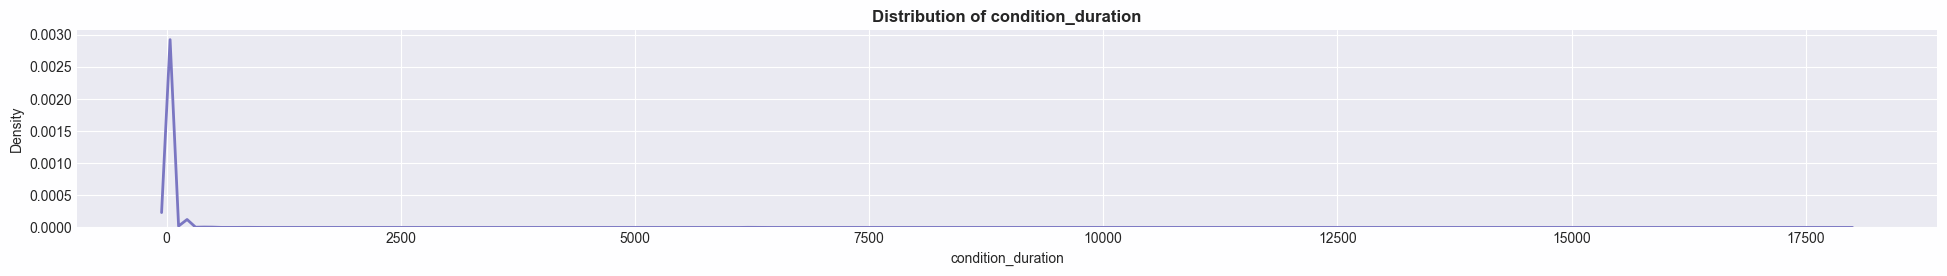

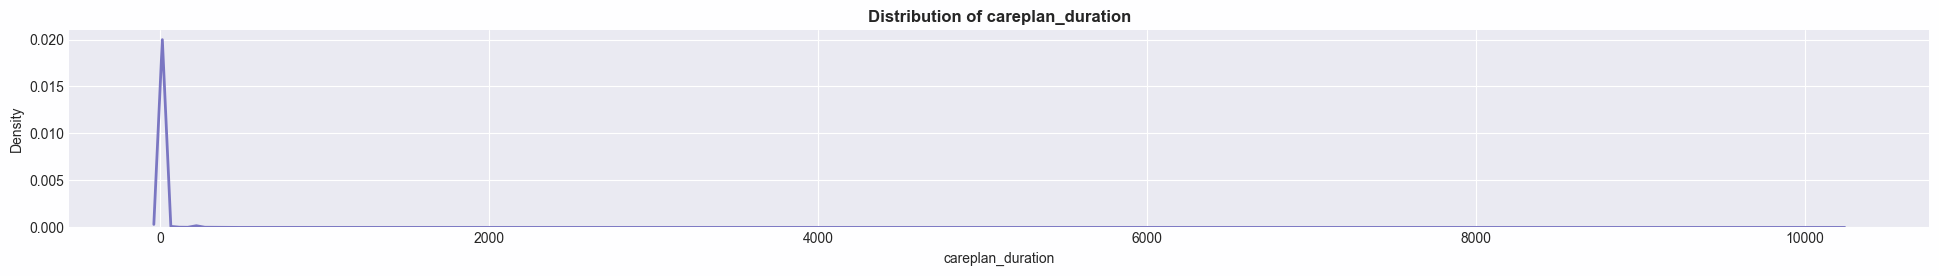

In [21]:
limit = len(large_num_cols)
for i,column in enumerate(large_num_cols):
    if i> limit:
        break
    fig = plt.figure(figsize=(24,21))
    plt.subplot(7,1,i+1)
    P.plot_kde(column=column,data=data)
    plt.show()

### ***Insights from univariate analysis of numerical columns***

- `avg_procedure_cost`, `avg_medicine_cost`,`total_medicine_cost`,`utilization`,`condition_duration`, `careplan_duration` - these columns are skewed towards right, with very few values at the higher end

- `age` column is spreaded nicely with a small peak near 100

In [22]:
for cols in large_cat_cols:
    df = data[cols].value_counts(normalize=True).mul(100).round(2).reset_index(name = r"% of observations").sort_values(by ="% of observations", ascending = False ).head(10)
    display(df)
    display("_"*50)

,payer_coverage,% of observations
0,0.00,24.53
1,129.16,18.03
2,69.16,16.72
3,89.16,13.37
4,54.16,9.11
5,59.16,6.00
6,49.16,4.84
7,64.16,4.07
8,74.16,1.92
9,29.16,0.94


'__________________________________________________'

,total_procedures,% of observations
0,0,60.5
1,1,29.59
2,2,5.62
3,3,2.35
4,4,0.78
5,20,0.57
6,5,0.49
7,7,0.08
8,6,0.0
9,21,0.0


'__________________________________________________'

,total_medicines,% of observations
0,0,48.88
1,1,35.73
2,2,10.24
3,3,2.05
4,4,1.15
5,5,0.83
6,6,0.36
7,9,0.29
8,10,0.25
9,8,0.11


'__________________________________________________'

,total_conditions,% of observations
0,0,85.66
1,1,13.25
2,2,0.88
3,3,0.18
4,4,0.03
5,5,0.01
6,7,0.0


'__________________________________________________'

### ***Insights from univariate analysis of large categorical columns***

- `payer_coverage`,`total_procedures`, `total_medicines`,`total_conditions` all these columns have 0 as most frequent values


***

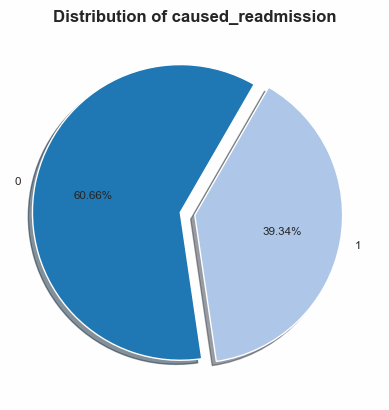

In [23]:
P.plot_pie('caused_readmission',data=data)

### **Insight from univariate analysis of target column**

- nearly 40% of observations are from `caused_readmission = 1` class

***

## **Bivariate Analysis with `caused_readmision` column**

In [24]:
small_cat_cols

['encounterclass',
 'duration',
 'marital',
 'race',
 'ethnicity',
 'patient_gender',
 'provider_gender',
 'base_encounter_cost',
 'reasons_for_medications',
 'is_ongoing_condition',
 'is_ongoing_careplan',
 'total_careplans']

**encounterclass**

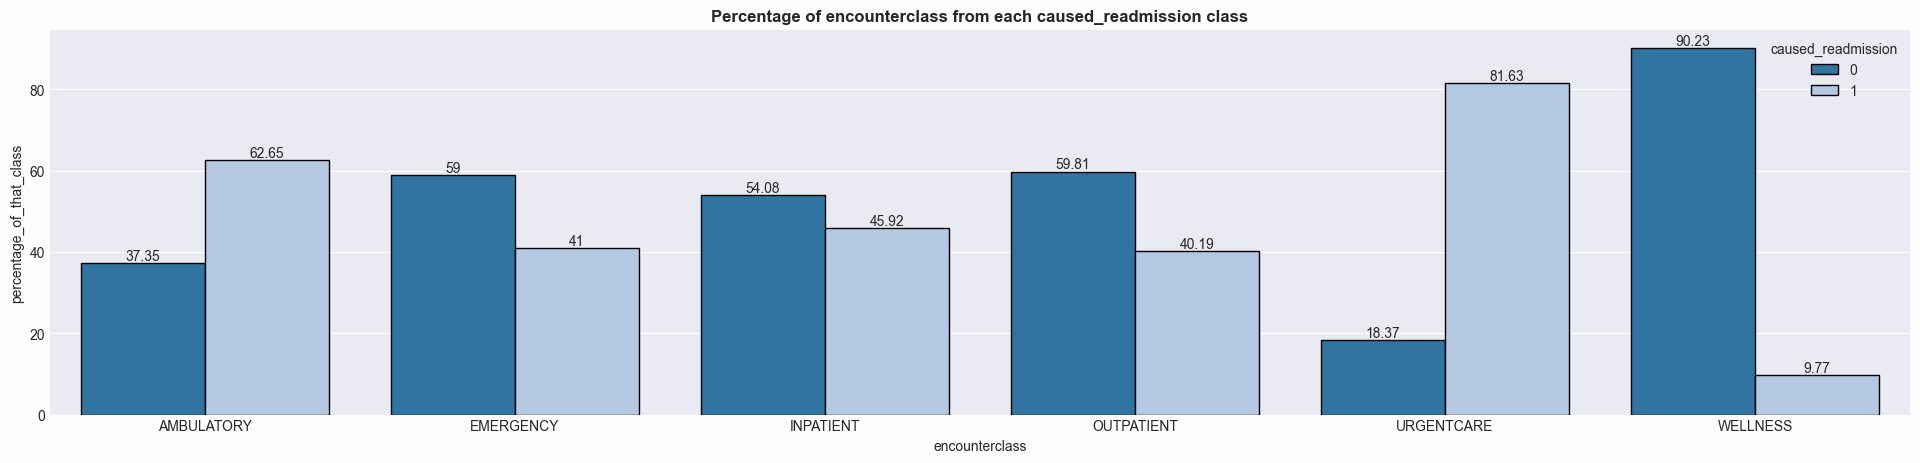

In [26]:
plt.figure(figsize=(24,5))
P.percentage_in_that_class(column='encounterclass',data=data,target='caused_readmission',orient='v')

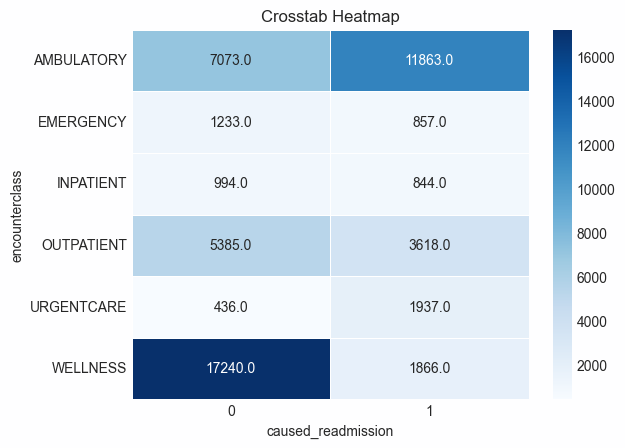

In [26]:
ct = pd.crosstab(data['encounterclass'],data['caused_readmission'])

P.plot_heatmap(ct)

`urgentcare` and `ambulatory` class is showing high percentage of readmission...

In [27]:
urgent_care_mask = (data['encounterclass']=='URGENTCARE') | (data['encounterclass']=='AMBULATORY')
ct = pd.crosstab(urgent_care_mask,data['caused_readmission'])

S.chi_sqared_test(ct)

Chi-square p-value: 0.00000
Cramer's V: 0.424 → Strong


{'statistic': np.float64(9609.214664856161),
 'p': np.float64(0.0),
 'dof': 1,
 'cramers_v': np.float64(0.42441724056929647),
 'strength': 'Strong',
 'expected': array([[19434.43476549, 12602.56523451],
        [12926.56523451,  8382.43476549]])}

urgentcare, ambulatory is showing strong association with caused_readmission column

***

**duration**

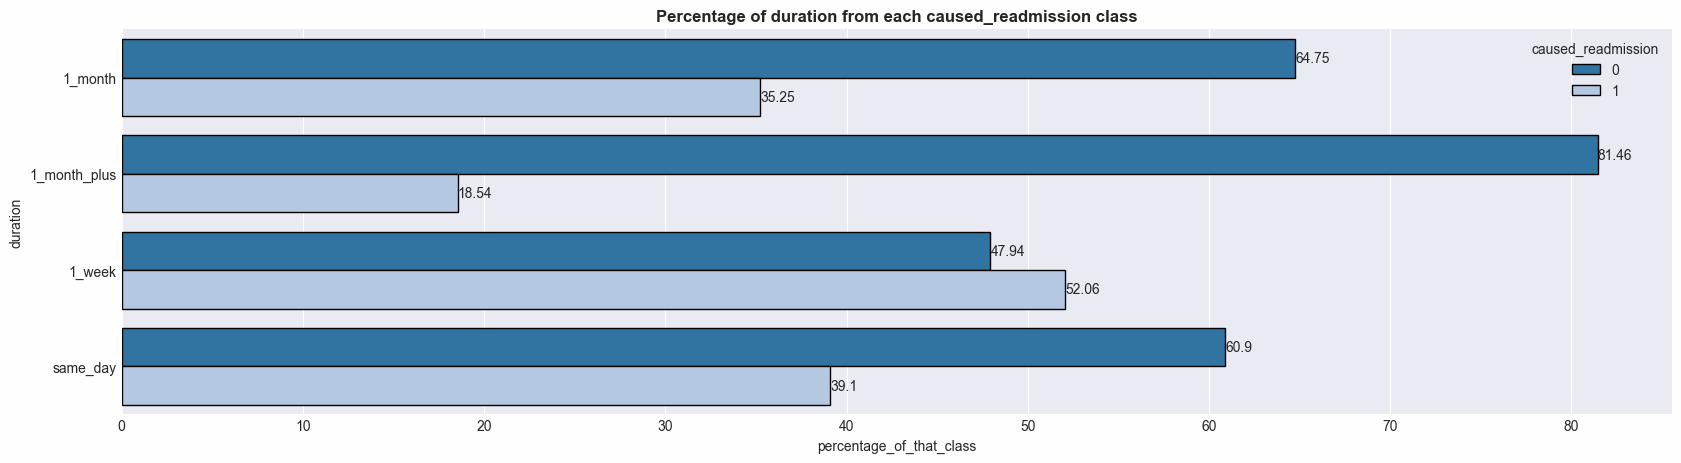

In [28]:
plt.figure(figsize=(20,5))
P.percentage_in_that_class(column='duration',data=data,target='caused_readmission',orient='h')

1 week is showing relateively little high percentage of readmission compared to other class

In [29]:
duration_mask = (data['duration']=='1_week')
ct = pd.crosstab(duration_mask,data['caused_readmission'])

S.chi_sqared_test(ct)

Chi-square p-value: 0.00000
Cramer's V: 0.041 → Weak


{'statistic': np.float64(88.89529252285048),
 'p': np.float64(4.162728052666708e-21),
 'dof': 1,
 'cramers_v': np.float64(0.04082145228857979),
 'strength': 'Weak',
 'expected': array([[31580.27404117, 20478.72595883],
        [  780.72595883,   506.27404117]])}

nothing specific with duration, have a weak relationship with caused_readmission column

***

**marital**

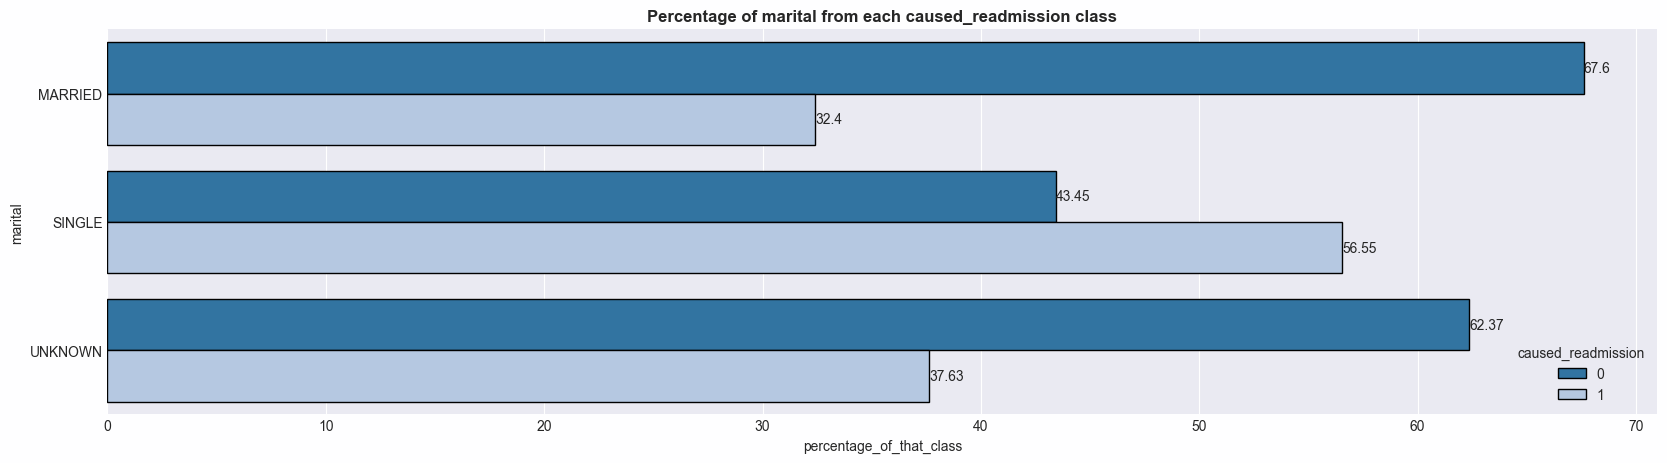

In [30]:
plt.figure(figsize=(20,5))
P.percentage_in_that_class(column='marital',data=data,target='caused_readmission',orient='h')

marital class single is showing a little high percentage of readmission

In [31]:
marital_mask = (data['marital']=='SINGLE')
ct = pd.crosstab(marital_mask,data['caused_readmission'])

S.chi_sqared_test(ct)

Chi-square p-value: 0.00000
Cramer's V: 0.202 → Moderate


{'statistic': np.float64(2179.8452996937226),
 'p': np.float64(0.0),
 'dof': 1,
 'cramers_v': np.float64(0.2021444892905853),
 'strength': 'Moderate',
 'expected': array([[24344.45489821, 15786.54510179],
        [ 8016.54510179,  5198.45489821]])}

marital class single is showing moderate effect on readmission

***

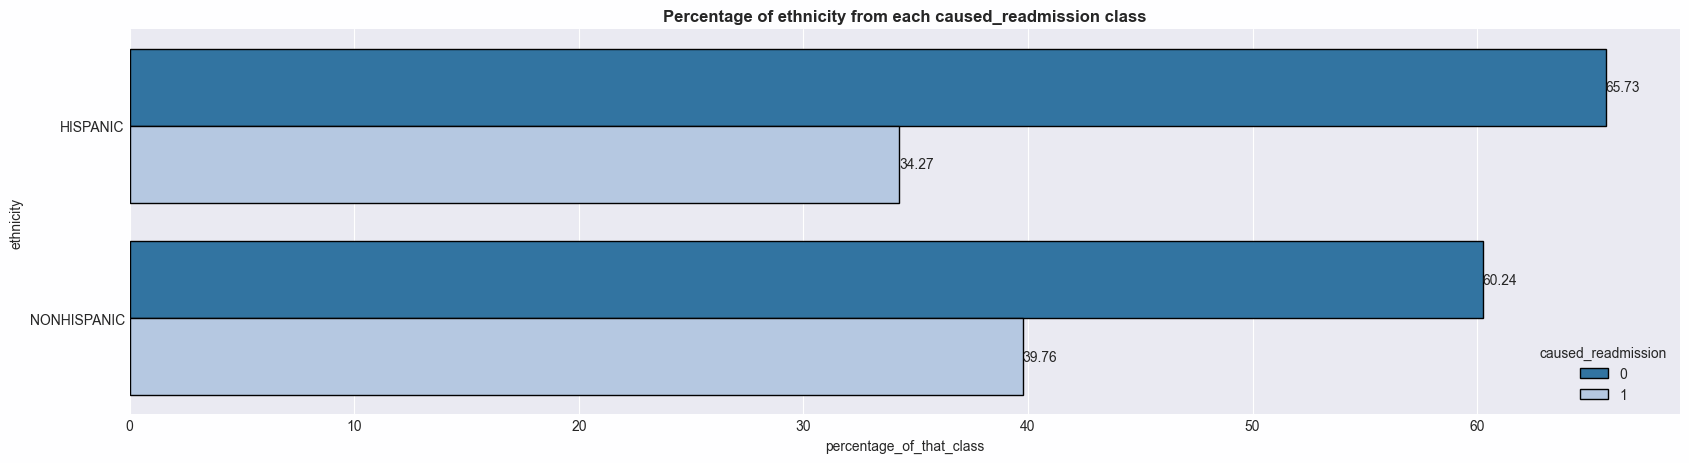

In [32]:
plt.figure(figsize=(20,5))
P.percentage_in_that_class(column='ethnicity',data=data,target='caused_readmission',orient='h')

we dont see any specific from ethnicity column

***

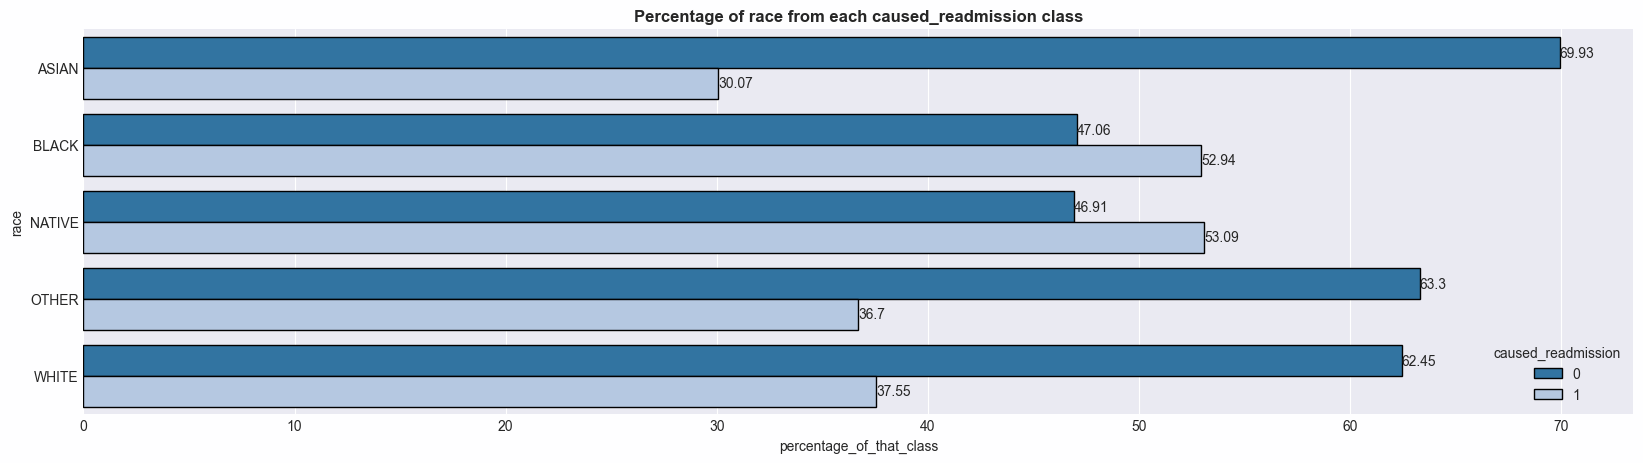

In [33]:
plt.figure(figsize=(20,5))
P.percentage_in_that_class(column='race',data=data,target='caused_readmission',orient='h')

black and native is showing a little high percentage of readmission

In [34]:
race_mask = (data['race']=='BLACK') |(data['race']=='NATIVE')
ct = pd.crosstab(race_mask,data['caused_readmission'])

S.chi_sqared_test(ct)

Chi-square p-value: 0.00000
Cramer's V: 0.116 → Moderate


{'statistic': np.float64(721.4187529546115),
 'p': np.float64(6.578920591267526e-159),
 'dof': 1,
 'cramers_v': np.float64(0.11629011055467452),
 'strength': 'Moderate',
 'expected': array([[27568.05842987, 17876.94157013],
        [ 4792.94157013,  3108.05842987]])}

we can see race is showing moderate relationship with readmission column

***

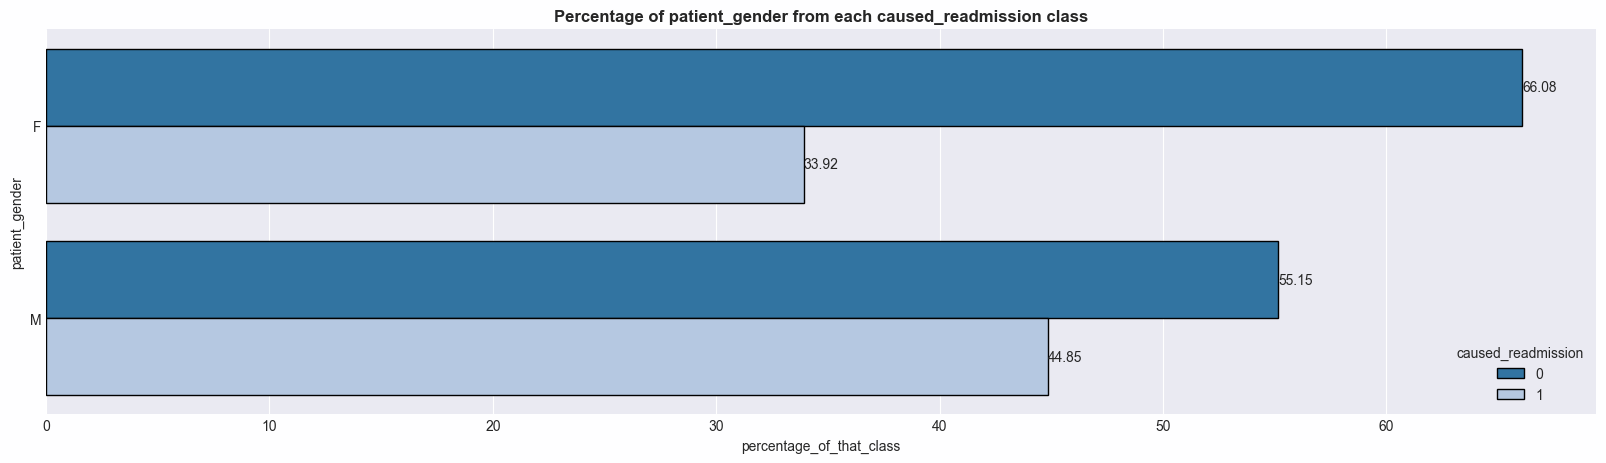

In [35]:
plt.figure(figsize=(20,5))
P.percentage_in_that_class(column='patient_gender',data=data,target='caused_readmission',orient='h')

male gender is showing a little extra in readmission

In [36]:
S.chi_sqared_test(pd.crosstab(data['patient_gender'],data['caused_readmission']))

Chi-square p-value: 0.00000
Cramer's V: 0.112 → Moderate


{'statistic': np.float64(666.8581761703845),
 'p': np.float64(4.817940462173038e-147),
 'dof': 1,
 'cramers_v': np.float64(0.11180618008630898),
 'strength': 'Moderate',
 'expected': array([[16312.74417951, 10578.25582049],
        [16048.25582049, 10406.74417951]])}

patient gender is showing moderate relationship with the readmission column

***

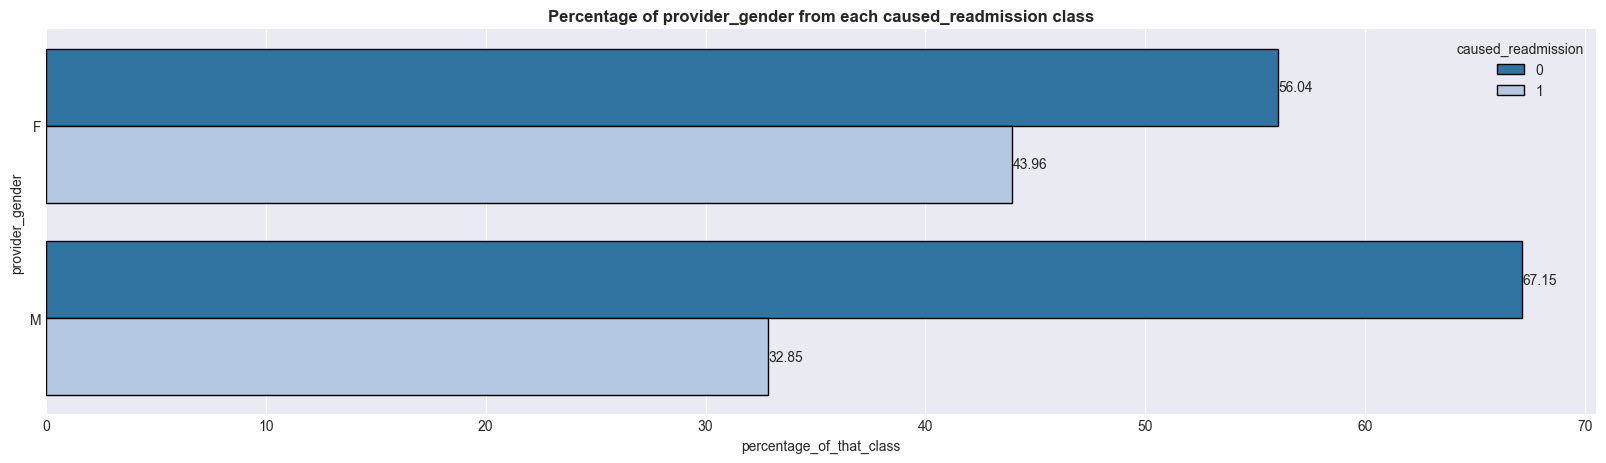

In [37]:
plt.figure(figsize=(20,5))
P.percentage_in_that_class(column='provider_gender',data=data,target='caused_readmission',orient='h')

Provider gender female is showing a little high readmssion than male provider gender

In [38]:
S.chi_sqared_test(pd.crosstab(data['provider_gender'],data['caused_readmission']))

Chi-square p-value: 0.00000
Cramer's V: 0.112 → Moderate


{'statistic': np.float64(670.0967043932897),
 'p': np.float64(9.518643988467803e-148),
 'dof': 1,
 'cramers_v': np.float64(0.11207733888491886),
 'strength': 'Moderate',
 'expected': array([[18887.25930716, 12247.74069284],
        [13473.74069284,  8737.25930716]])}

provider gender have moderate association on readmission

***

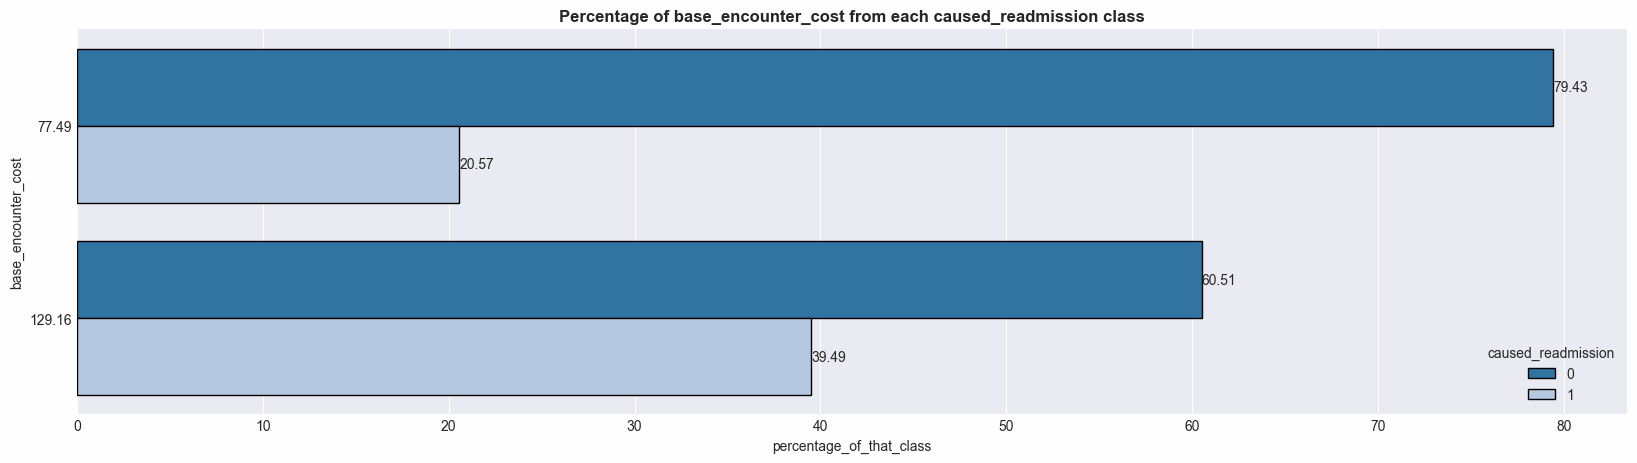

In [39]:
plt.figure(figsize=(20,5))
P.percentage_in_that_class(column='base_encounter_cost',data=data,target='caused_readmission',orient='h')

base encounter cost 129 is showing relatively high percentage of caused readmission

In [40]:
S.chi_sqared_test(pd.crosstab(data['base_encounter_cost'],data['caused_readmission']))

Chi-square p-value: 0.00000
Cramer's V: 0.034 → Weak


{'statistic': np.float64(62.1611755493556),
 'p': np.float64(3.1646597893075545e-15),
 'dof': 1,
 'cramers_v': np.float64(0.03413568947293531),
 'strength': 'Weak',
 'expected': array([[  256.60223822,   166.39776178],
        [32104.39776178, 20818.60223822]])}

nothing specific found from base encounter cost

***

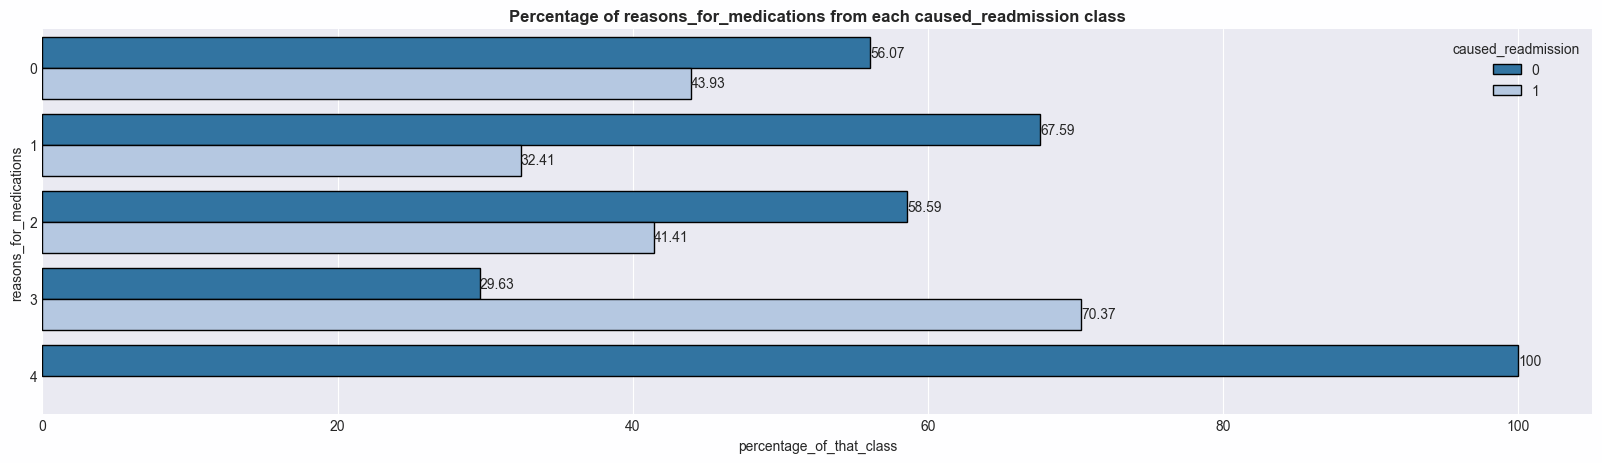

In [41]:
plt.figure(figsize=(20,5))
P.percentage_in_that_class(column='reasons_for_medications',data=data,target='caused_readmission',orient='h')

medications reasons 3 is shwoing high percentage of readmission cause

In [42]:
reason_for_medication_mask = (data['reasons_for_medications']==3)
ct = pd.crosstab(reason_for_medication_mask,data['caused_readmission'])

S.chi_sqared_test(ct)

Chi-square p-value: 0.00000
Cramer's V: 0.032 → Weak


{'statistic': np.float64(53.32381696999601),
 'p': np.float64(2.828562713614215e-13),
 'dof': 1,
 'cramers_v': np.float64(0.031616201020169626),
 'strength': 'Weak',
 'expected': array([[32279.10566865, 20931.89433135],
        [   81.89433135,    53.10566865]])}

reason for medication have not any significant impact on caused readmission

***

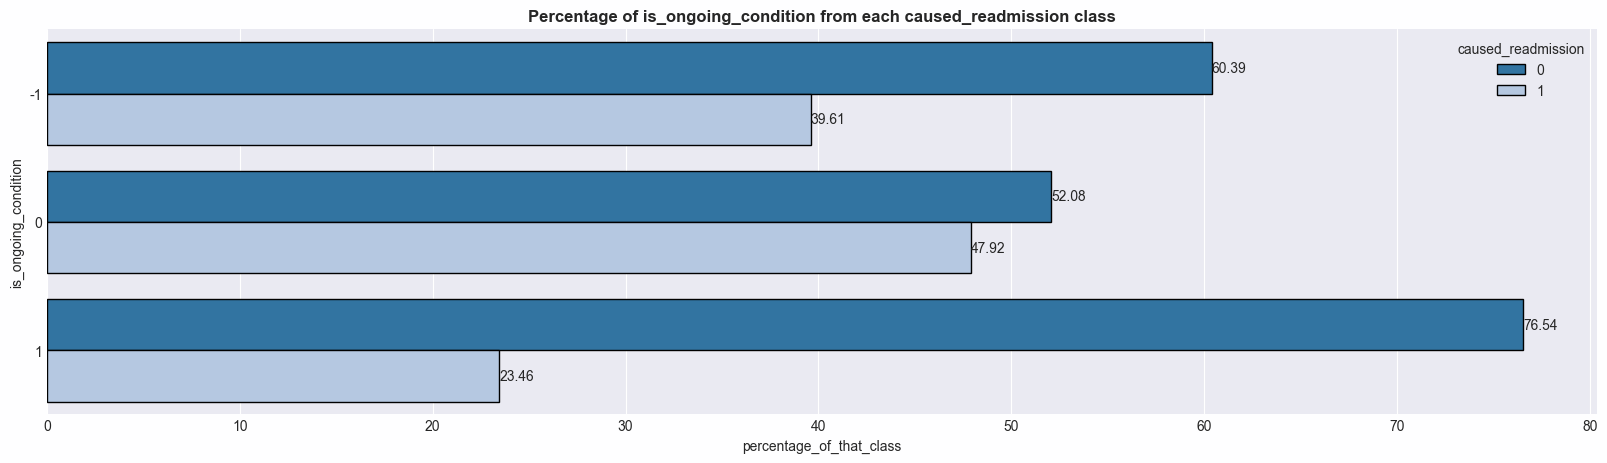

In [43]:
plt.figure(figsize=(20,5))
P.percentage_in_that_class(column='is_ongoing_condition',data=data,target='caused_readmission',orient='h')

we dont see any thing specific

***

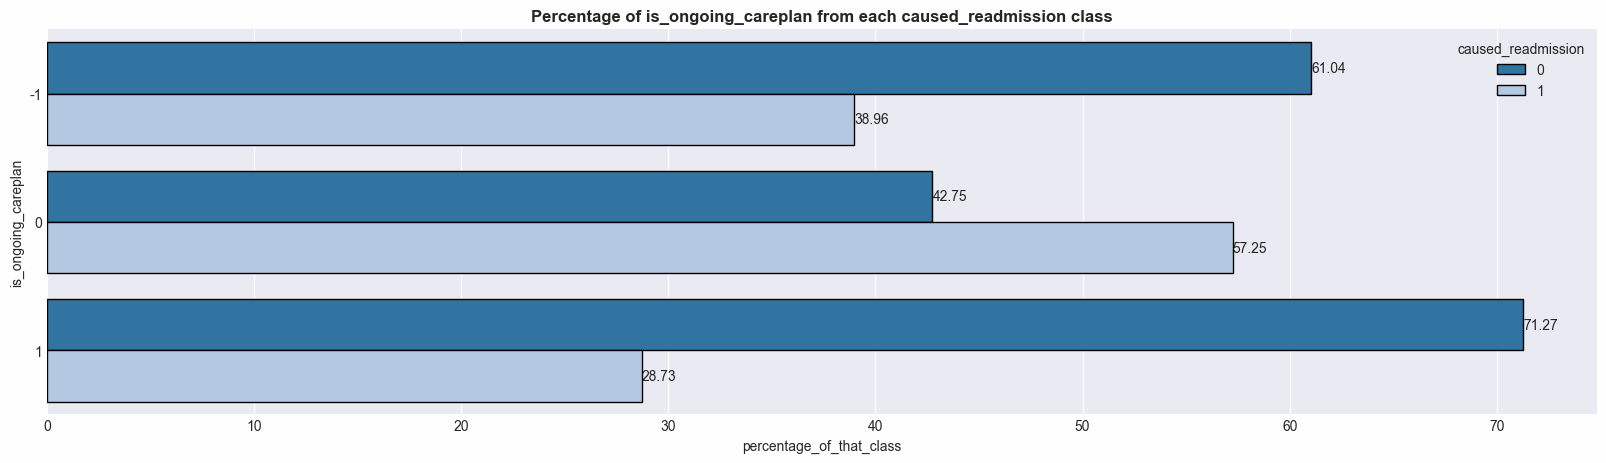

In [44]:
plt.figure(figsize=(20,5))
P.percentage_in_that_class(column='is_ongoing_careplan',data=data,target='caused_readmission',orient='h')

ongoing careplan 0 is showing high percentage of readmission relative to others

In [45]:
ongoing_careplan_mask = (data['is_ongoing_careplan']==0)
ct = pd.crosstab(ongoing_careplan_mask,data['caused_readmission'])

S.chi_sqared_test(ct)

Chi-square p-value: 0.00000
Cramer's V: 0.071 → Weak


{'statistic': np.float64(271.5869950151499),
 'p': np.float64(5.117222385947723e-61),
 'dof': 1,
 'cramers_v': np.float64(0.07135157344350407),
 'strength': 'Weak',
 'expected': array([[31177.47525588, 20217.52474412],
        [ 1183.52474412,   767.47525588]])}

ongoing careplan have weak relationship with the caused readmission column

***

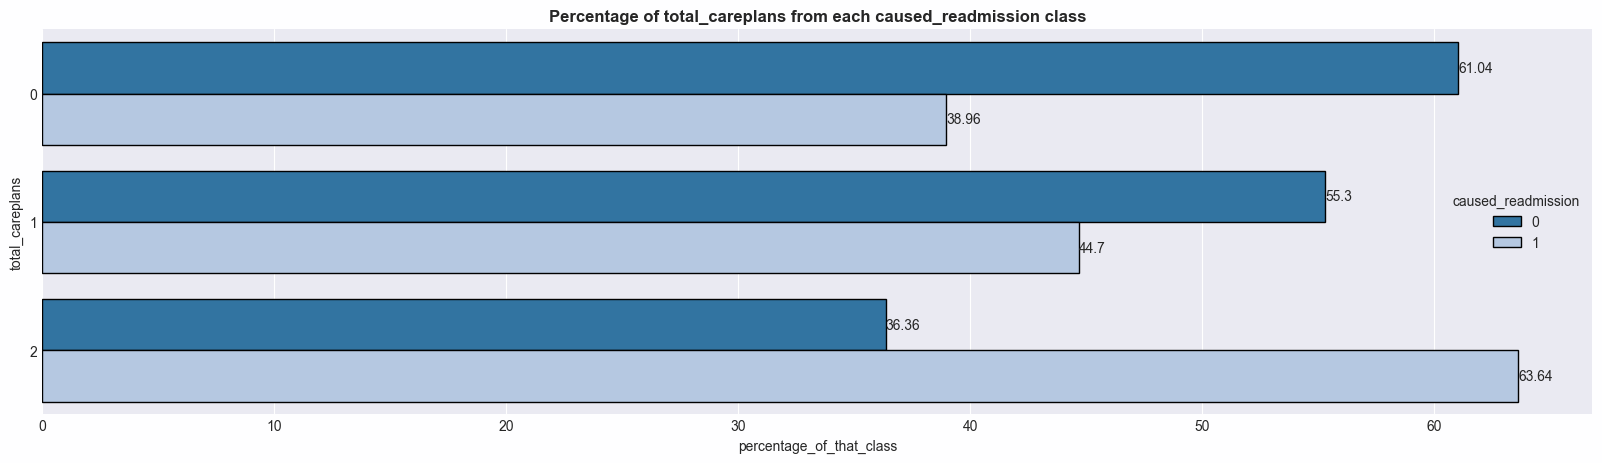

In [46]:
plt.figure(figsize=(20,5))
P.percentage_in_that_class(column='total_careplans',data=data,target='caused_readmission',orient='h')

total careplan 2 is showing high percentage of readmission

In [47]:
pd.crosstab(data['total_careplans'],data['caused_readmission'])

caused_readmission,0,1
total_careplans,,
0,30443,19431
1,1914,1547
2,4,7


In [48]:
total_careplan_mask = (data['total_careplans']==2)
ct = pd.crosstab(total_careplan_mask,data['caused_readmission'])

S.chi_sqared_test(ct)

Chi-square p-value: 0.17983
Cramer's V: 0.006 → Weak


{'statistic': np.float64(1.799027304264948),
 'p': np.float64(0.179830133545511),
 'dof': 1,
 'cramers_v': np.float64(0.005807215560295131),
 'strength': 'Weak',
 'expected': array([[3.23543271e+04, 2.09806729e+04],
        [6.67287144e+00, 4.32712856e+00]])}

there is no association

***

In [49]:
large_num_cols

['avg_procedure_cost',
 'avg_base_medicine_cost',
 'avg_total_medicine_cost',
 'age_as_2022',
 'utilization',
 'condition_duration',
 'careplan_duration']

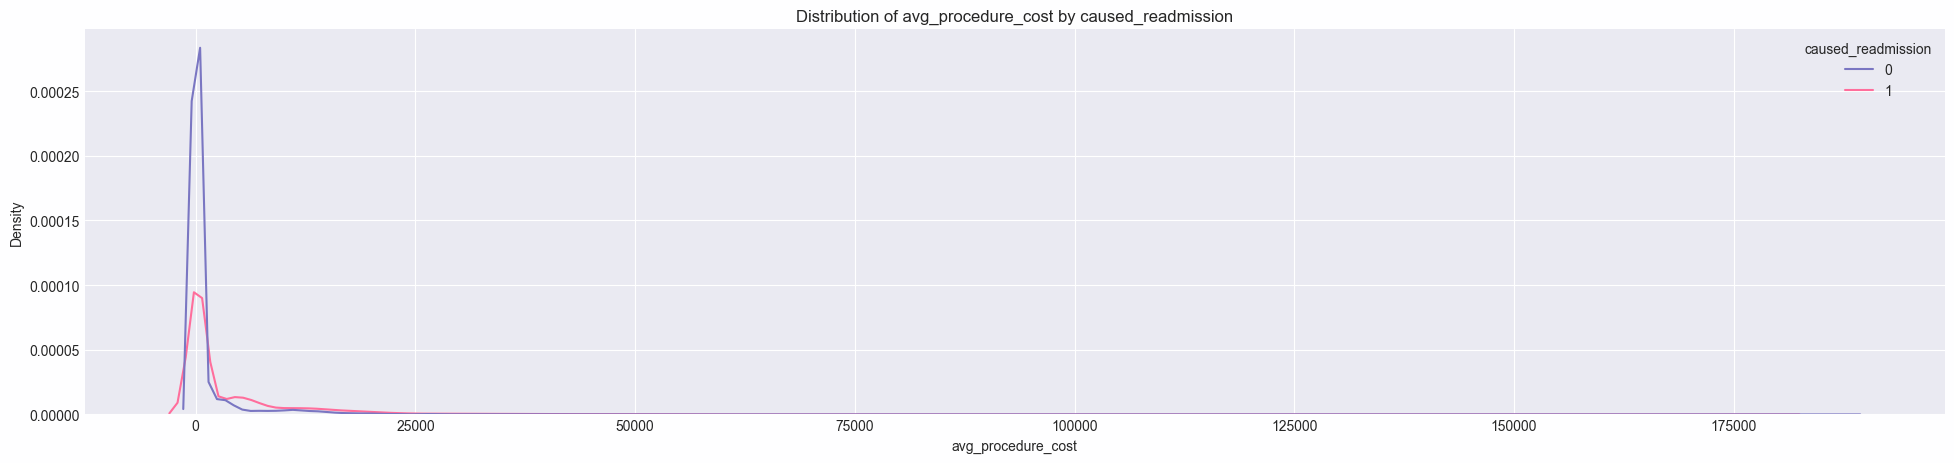

In [50]:
plt.figure(figsize=(24,5))
P.kde_in_both_class(column='avg_procedure_cost',data= data,target='caused_readmission')

In [51]:
data.groupby('caused_readmission')['avg_procedure_cost'].mean().round(2)

caused_readmission
0    1078.99
1    3749.38
Name: avg_procedure_cost, dtype: float64

avg procedure cost is showing high average for readmission cause

In [52]:
first = data[data['caused_readmission'] == 1]['avg_procedure_cost']
second = data[data['caused_readmission'] == 0]['avg_procedure_cost']

S.is_var_same(first,second)

Levene p-value: 0.00000 → Not equal variance


{'statistic': np.float64(2991.3640007146532),
 'p': np.float64(0.0),
 'result': 'Not equal variance'}

In [53]:
S.ttest(first=first,second= second,equal_variance=False)

T-test p-value: 0.00000 → Reject null (groups different)


{'statistic': np.float64(48.873624316348526),
 'p': np.float64(0.0),
 'result': 'Reject null (groups different)'}

groups are different in avg_procedure cost

***

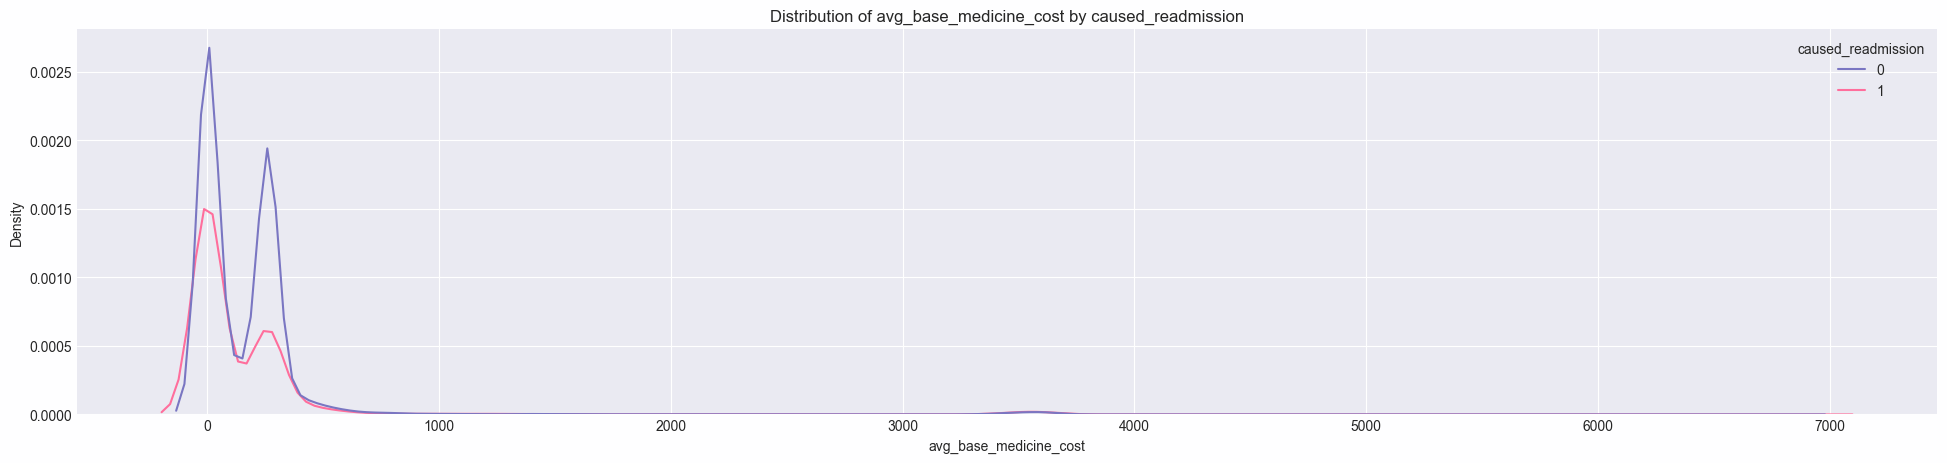

In [54]:
plt.figure(figsize=(24,5))
P.kde_in_both_class(column='avg_base_medicine_cost',data= data,target='caused_readmission')

In [55]:
data.groupby('caused_readmission')['avg_base_medicine_cost'].mean().round(2)

caused_readmission
0    164.64
1    159.46
Name: avg_base_medicine_cost, dtype: float64

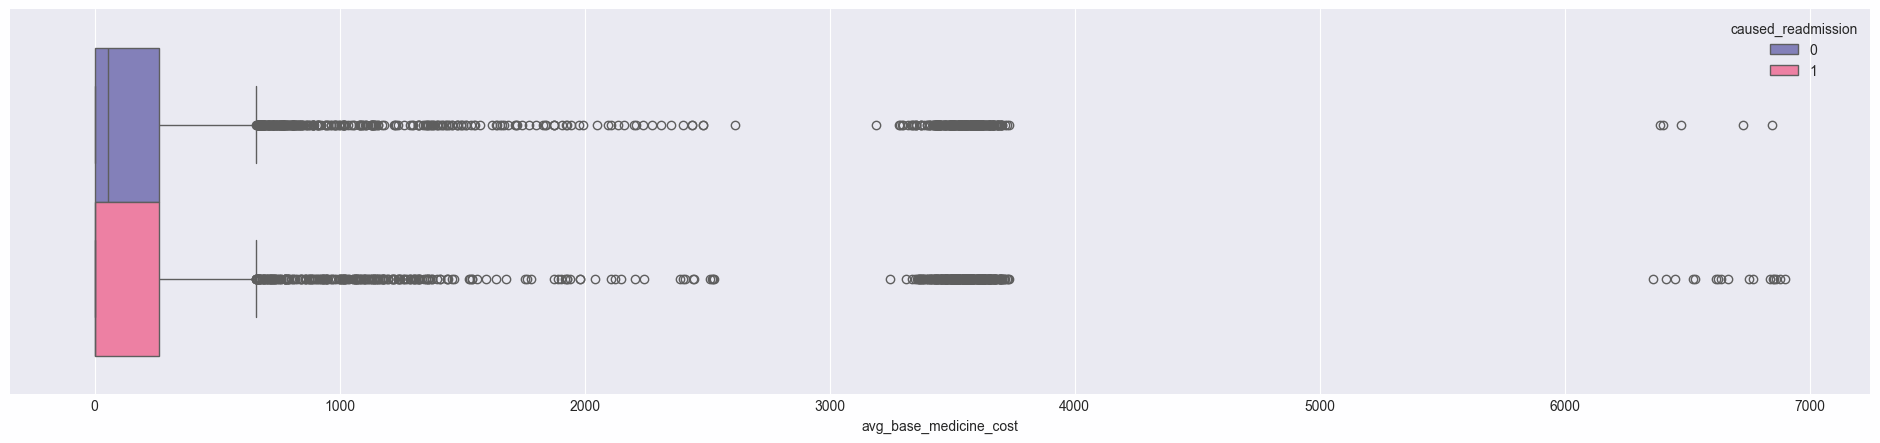

In [56]:
plt.figure(figsize=(24,5))
sns.boxplot(x = 'avg_base_medicine_cost',data= data,hue= 'caused_readmission')
plt.show()

we do not see any specific pattern

***

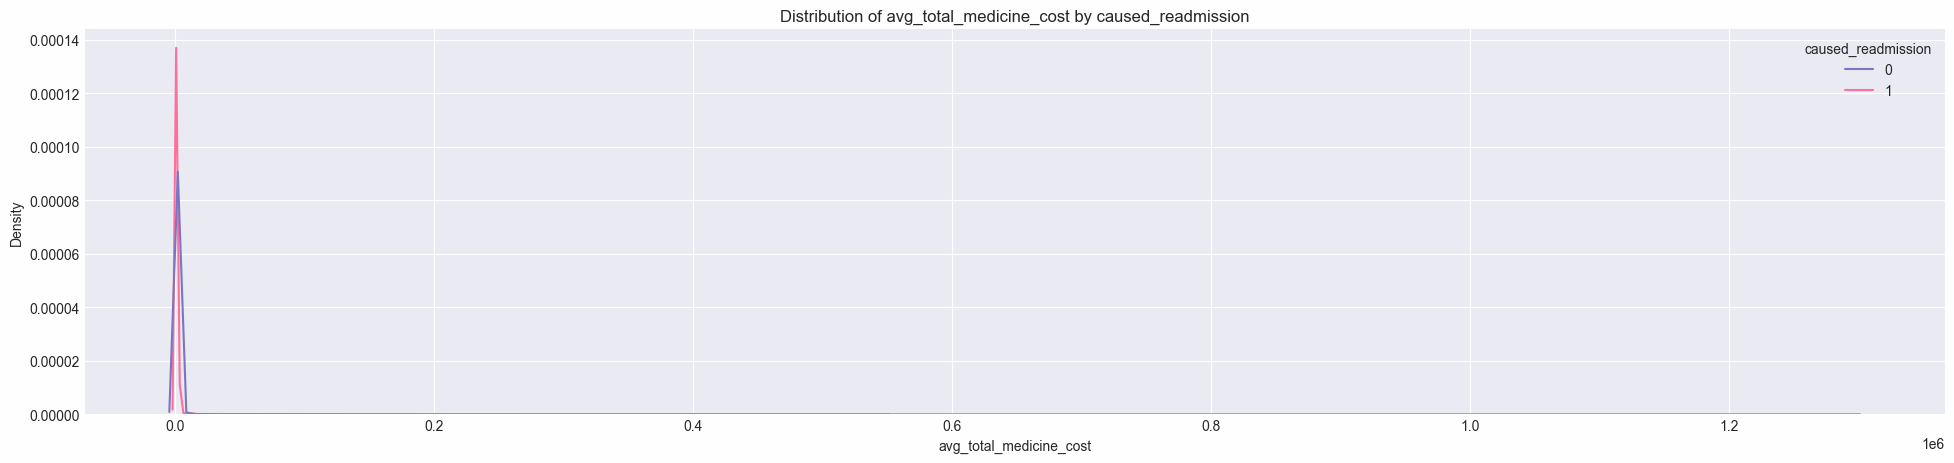

In [57]:
plt.figure(figsize=(24,5))
P.kde_in_both_class(column='avg_total_medicine_cost',data= data,target='caused_readmission')

In [58]:
data.groupby('caused_readmission')['avg_total_medicine_cost'].mean().round(2)

caused_readmission
0    2021.88
1     521.54
Name: avg_total_medicine_cost, dtype: float64

In [59]:
first = data[data['caused_readmission'] == 1]['avg_total_medicine_cost']
second = data[data['caused_readmission'] == 0]['avg_total_medicine_cost']

S.is_var_same(first_series=first,second_series=second)

Levene p-value: 0.00000 → Not equal variance


{'statistic': np.float64(286.8013745990847),
 'p': np.float64(3.643370206885304e-64),
 'result': 'Not equal variance'}

In [60]:
S.ttest(first,second,False)

T-test p-value: 0.00000 → Reject null (groups different)


{'statistic': np.float64(-19.895472683790494),
 'p': np.float64(1.0298441025321143e-87),
 'result': 'Reject null (groups different)'}

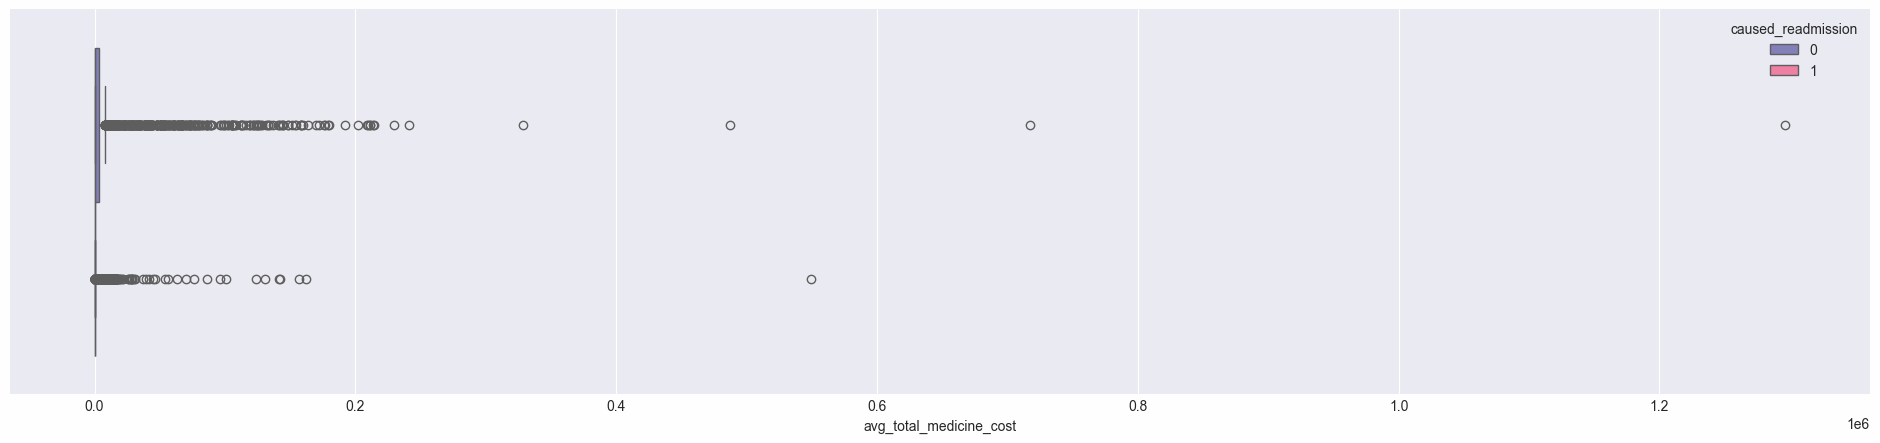

In [59]:
plt.figure(figsize=(24,5))
sns.boxplot(x = 'avg_total_medicine_cost',data= data,hue= 'caused_readmission')
plt.show()

groups are different

***

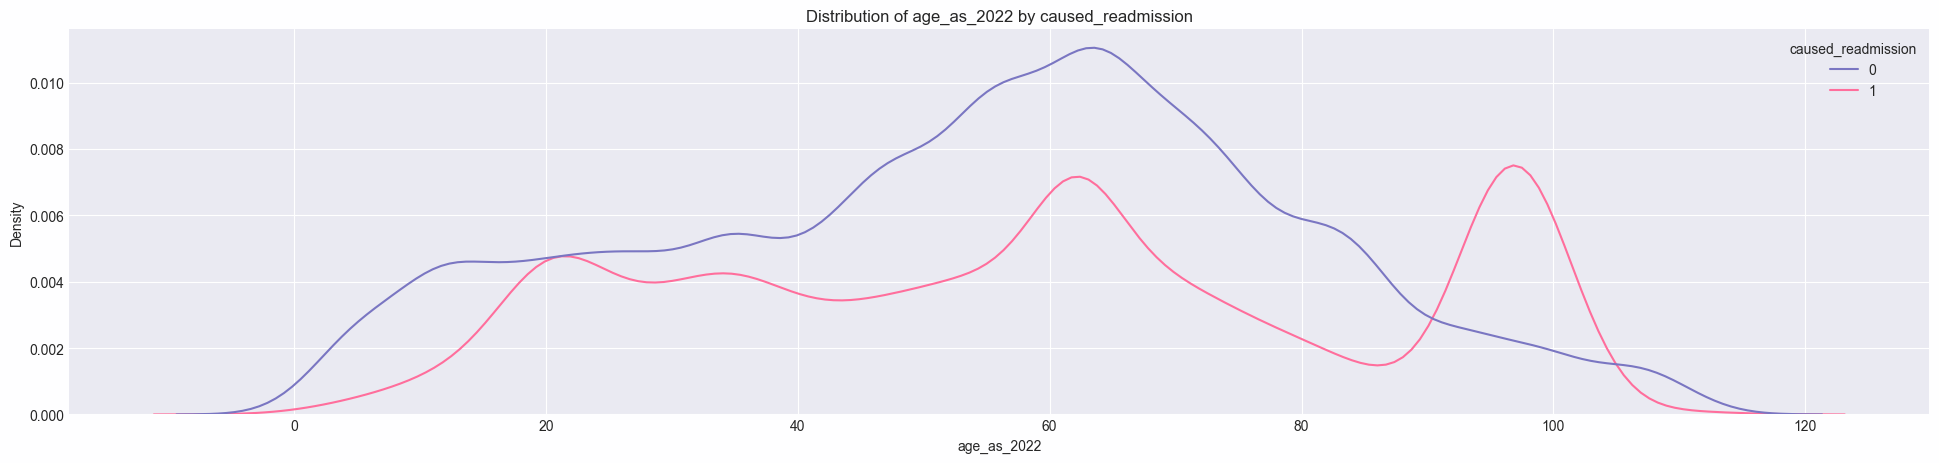

In [63]:
plt.figure(figsize=(24,5))
P.kde_in_both_class(column='age_as_2022',data= data,target='caused_readmission')

In [64]:
data.groupby('caused_readmission')['age_as_2022'].mean().round(2)

caused_readmission
0    53.89
1    58.38
Name: age_as_2022, dtype: float64

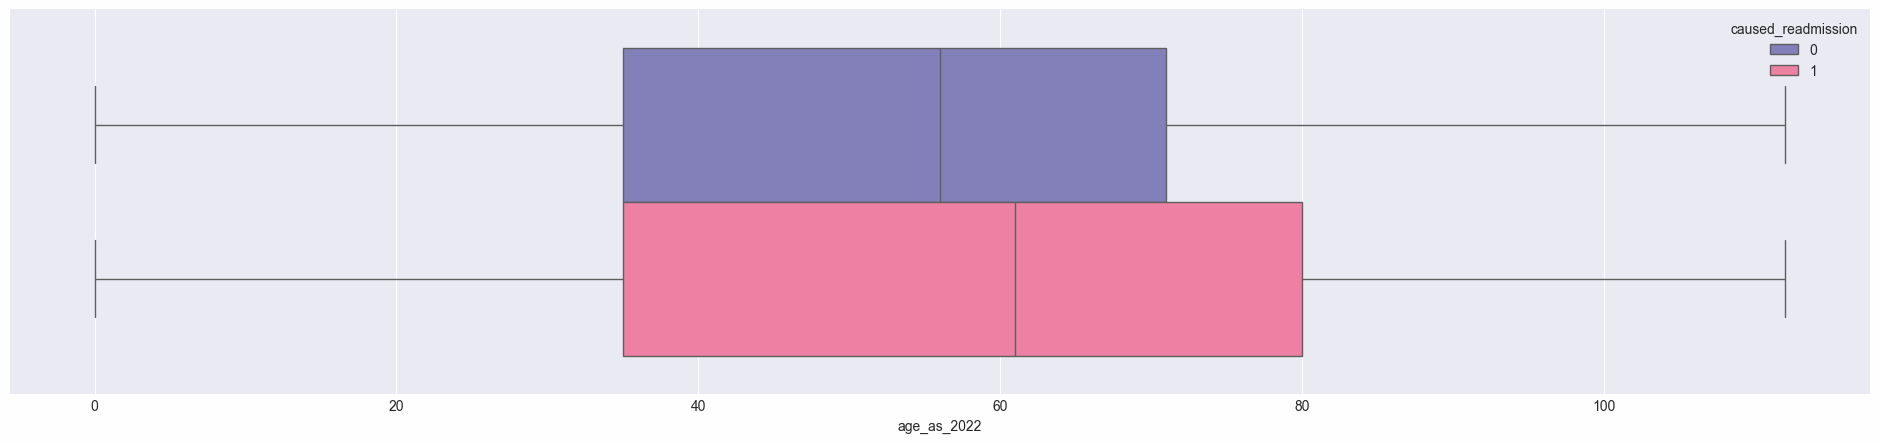

In [65]:
plt.figure(figsize=(24,5))
sns.boxplot(x = 'age_as_2022',data= data,hue= 'caused_readmission')
plt.show()

In [61]:
first = data[data['caused_readmission'] == 1]['age_as_2022']
second = data[data['caused_readmission'] == 0]['age_as_2022']

S.is_var_same(first,second)

Levene p-value: 0.00000 → Not equal variance


{'statistic': np.float64(412.49733909620755),
 'p': np.float64(2.3267100304794434e-91),
 'result': 'Not equal variance'}

In [62]:
S.ttest(first,second,False)

T-test p-value: 0.00000 → Reject null (groups different)


{'statistic': np.float64(19.282559866609546),
 'p': np.float64(1.7156939604683694e-82),
 'result': 'Reject null (groups different)'}

we see difference in those classes

***

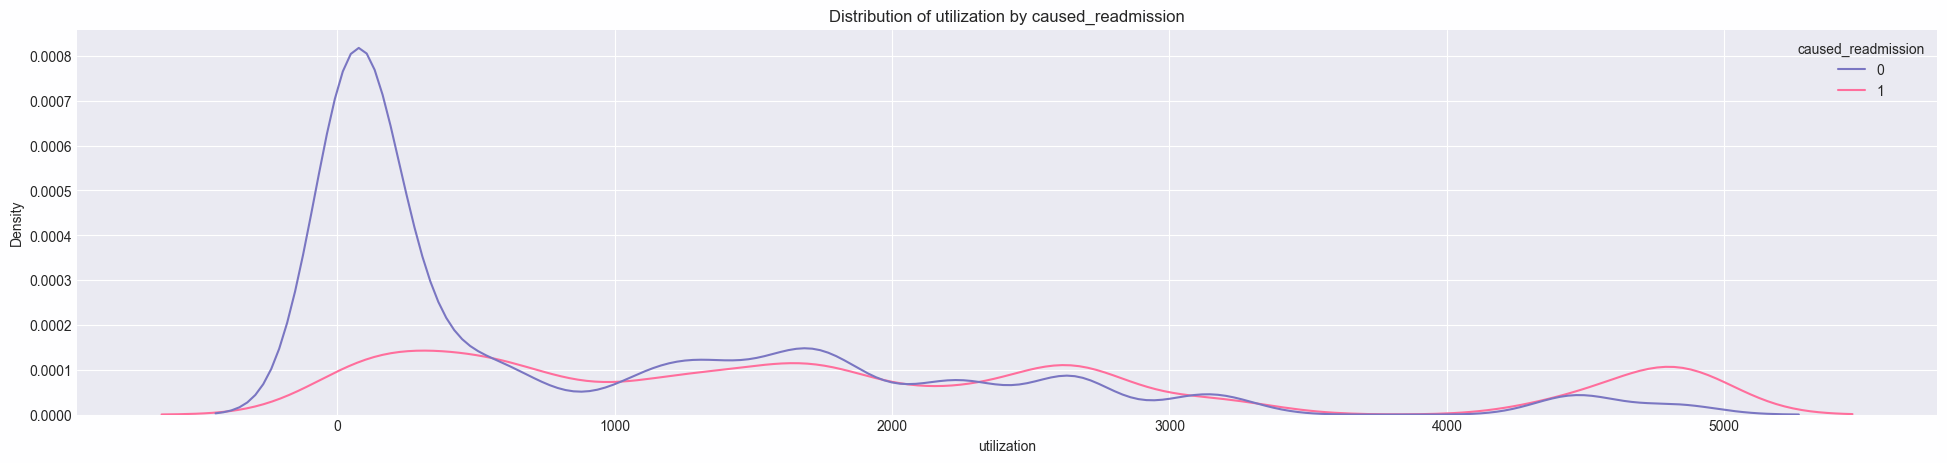

In [67]:
plt.figure(figsize=(24,5))
P.kde_in_both_class(column='utilization',data= data,target='caused_readmission')

In [71]:
data.groupby('caused_readmission')['utilization'].mean().round(2)

caused_readmission
0     917.01
1    1966.10
Name: utilization, dtype: float64

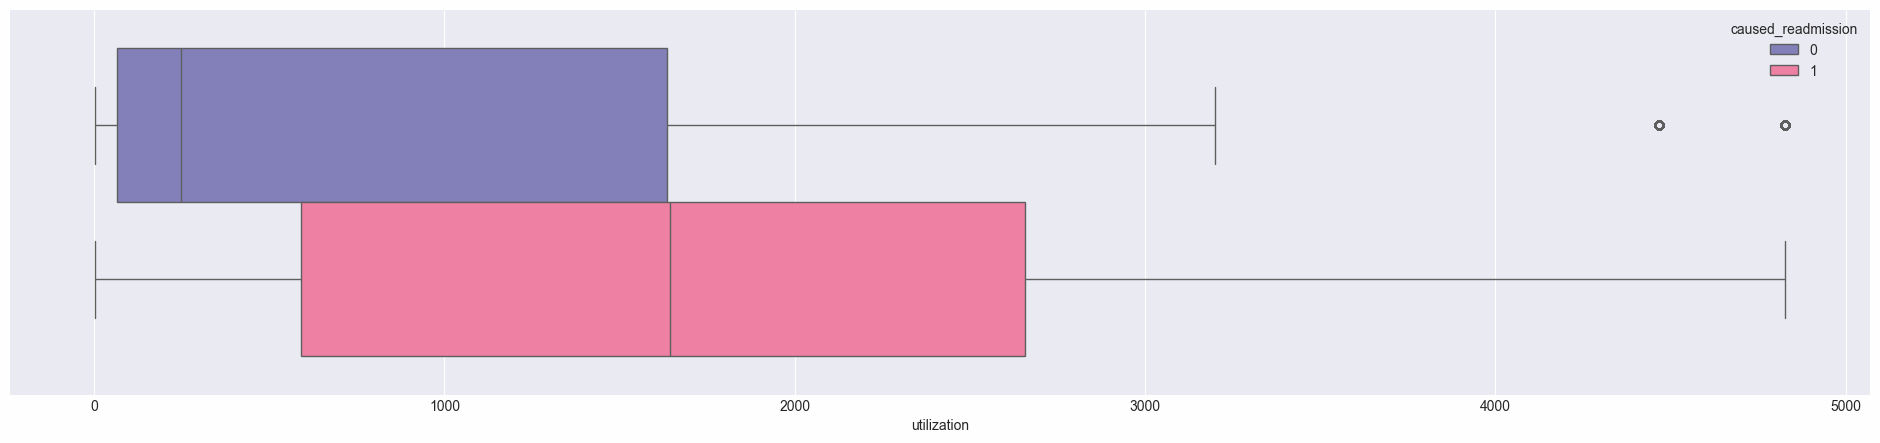

In [72]:
plt.figure(figsize=(24,5))
sns.boxplot(x = 'utilization',data= data,hue= 'caused_readmission')
plt.show()

In [63]:
first = data[data['caused_readmission'] == 1]['utilization']
second = data[data['caused_readmission'] == 0]['utilization']

S.is_var_same(first,second)

Levene p-value: 0.00000 → Not equal variance


{'statistic': np.float64(1993.903348266252),
 'p': np.float64(0.0),
 'result': 'Not equal variance'}

In [64]:
S.ttest(first,second,False)

T-test p-value: 0.00000 → Reject null (groups different)


{'statistic': np.float64(83.84332714468277),
 'p': np.float64(0.0),
 'result': 'Reject null (groups different)'}

groups are different

***

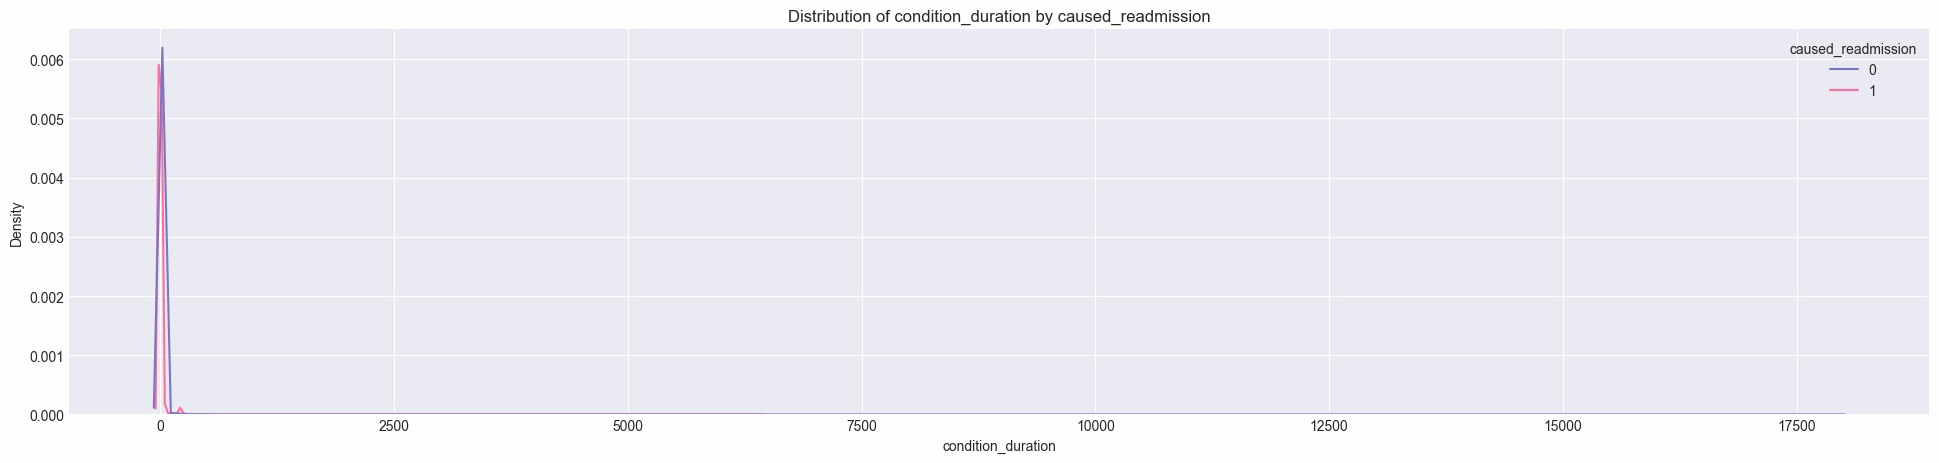

In [74]:
plt.figure(figsize=(24,5))
P.kde_in_both_class(column='condition_duration',data= data,target='caused_readmission')

In [75]:
data.groupby('caused_readmission')['condition_duration'].mean().round(2)

caused_readmission
0    7.28
1    7.74
Name: condition_duration, dtype: Float64

nothing specific

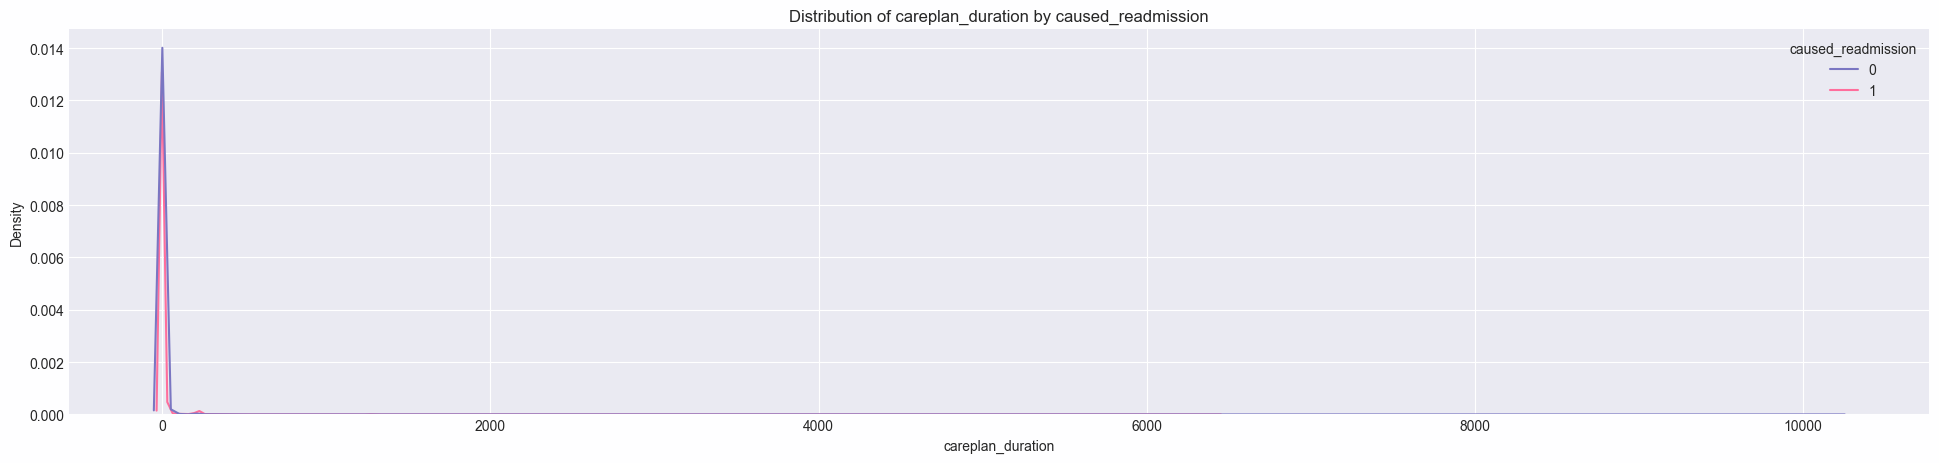

In [76]:
plt.figure(figsize=(24,5))
P.kde_in_both_class(column='careplan_duration',data= data,target='caused_readmission')

In [80]:
data.groupby('caused_readmission')['careplan_duration'].mean().round(2)

caused_readmission
0     5.5
1    9.49
Name: careplan_duration, dtype: Float64

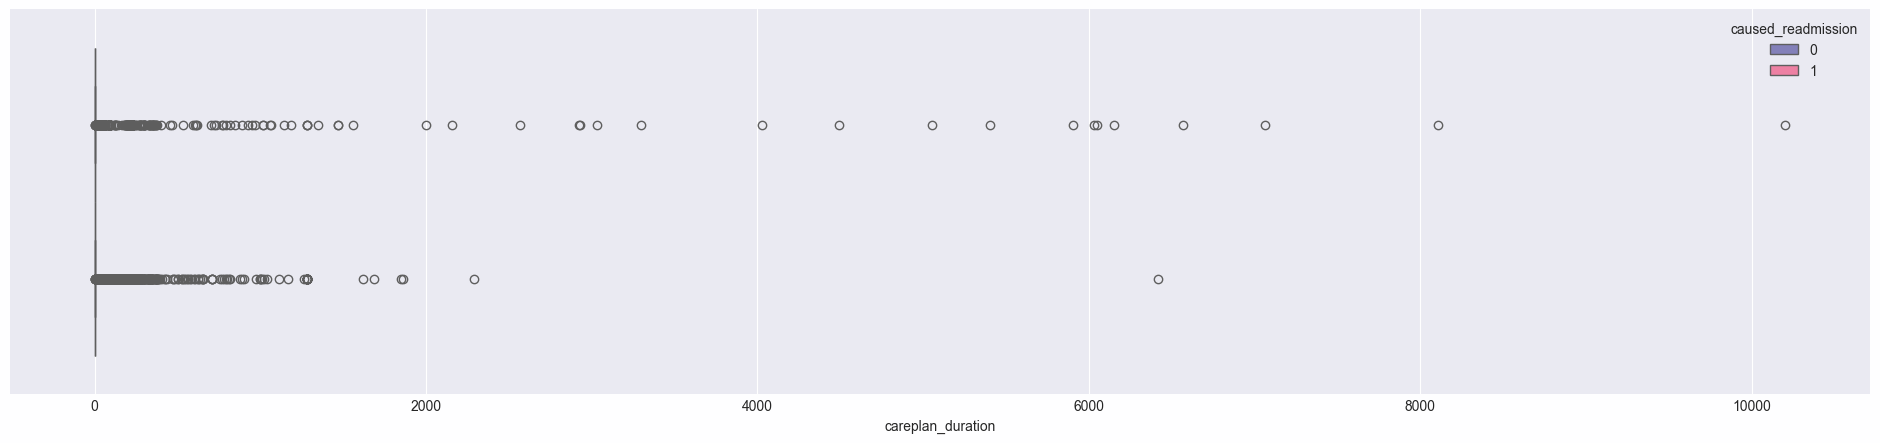

In [78]:
plt.figure(figsize=(24,5))
sns.boxplot(x = 'careplan_duration',data= data,hue= 'caused_readmission')
plt.show()

In [65]:
first = data[data['caused_readmission'] == 1]['careplan_duration']
second = data[data['caused_readmission'] == 0]['careplan_duration']

S.is_var_same(first,second)

Levene p-value: 0.00013 → Not equal variance


{'statistic': np.float64(14.679141124487838),
 'p': np.float64(0.0001275948535302173),
 'result': 'Not equal variance'}

In [66]:
S.ttest(first,second,False)

T-test p-value: 0.00002 → Reject null (groups different)


{'statistic': np.float64(4.220611616053646),
 'p': np.float64(2.440439746785299e-05),
 'result': 'Reject null (groups different)'}

nothing too specific

### Findings from bivariate analysis with causes_readmisson column

- ***`urgentcare` and `ambulatory` class showed a high percentage of readmission, after doing statistical test, we can validate that patients of these classes are more likely to cause readmission more***

- ***`single` marital class showed a high percentage of readmission, after doing statistical test wen can validate that marital class single have a moderate impact on readmission,with single marital being cause for readmission more than other marital classes***

- ***`BLACK` and `NATIVE` classes in `race` column showed a littile more percentage in readmission class, after doing statistical test, we can validate that race has a moderate relationship with readmission, andthese 2 classes are more likely to cause readmission***

- ***`MALE` `patient_gender` showed a little more in readmission class, after doing statistical test, we can validate that patient_gender male have more chance of causing readmisssion than female***

- ***`FEMALE` `provider_gender` showed a little high readmission, after doing statistical test, we can validate that female provider in encounter leads to slighly high readmission***

- ***`avg_procedure_cost` showed high mean for causing readmission...after doing statistical test we can validate that encuonter with high average procedure cost is more likely to cause readmission***

- ***`avg_total_medicine_cost` showed low average for causing readmission case, afte doing statistical test we can validate that lower the `avg_total_medicine_cost` leads to cause readmission***

- ***`age` column showed, for high aged people there is more chance of causing readmission than lower aged people***

- ***`utilization` column showed very low mean for non readmitted patients, after doing statistical test we validate these fact..so assumption is less experienced doctors are doing less readmission than more advantage, possible cause can be high severity disease are more handeled by experienced doctors***